https://www.kaggle.com/code/gauravduttakiit/risk-analytics-in-banking-financial-services-1/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df2 = pd.read_csv('application_data.csv')

In [3]:
df1 = pd.read_csv('previous_application.csv')
df2 = pd.read_csv('application_data.csv')
df3 = pd.read_csv('columns_description.csv',encoding='cp1252')

In [4]:
df2.shape

(307511, 122)

In [5]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 10000)

###### Reading the head of the files

In [6]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [7]:
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [8]:
df3.head()

Unnamed: 0             Table                 Row  \
0           1  application_data          SK_ID_CURR   
1           2  application_data              TARGET   
2           5  application_data  NAME_CONTRACT_TYPE   
3           6  application_data         CODE_GENDER   
4           7  application_data        FLAG_OWN_CAR   

                                         Description Special  
0                           ID of loan in our sample     NaN  
1  Target variable (1 - client with payment diffi...     NaN  
2        Identification if loan is cash or revolving     NaN  
3                               Gender of the client     NaN  
4                      Flag if the client owns a car     NaN

##### Finding the information in the Previous Application dataset

In [9]:
df1.shape

(1670214, 37)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [11]:
df1.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [12]:
100*(df1.isnull().sum()/df1.isnull().count())

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

###### Removing columns with missing values greater then 40%

In [13]:
df1.drop(['AMT_DOWN_PAYMENT','RATE_DOWN_PAYMENT','RATE_INTEREST_PRIMARY',
         'RATE_INTEREST_PRIVILEGED','NAME_TYPE_SUITE'],axis = 1,inplace=True)

In [14]:
100*(df1.isnull().sum()/df1.isnull().count())

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [15]:
df1.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE  \
0            -73  Cash through the bank                XAP         Repeater   
1           -164                    XNA                XAP         Repeater   
2           -301  Cash through the bank                XAP         Repeater   
3           -512  Cash through the bank                XAP         Repeater   
4           -781  Cash through the bank                 HC         Repeater   

  NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              Mobile            POS               XNA   
1                 XNA           Cash            x-sell   
2                 XNA           Cash            x-sell   
3                 XNA           Cash            x-sell   
4                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1                        1.0  
2                        1.0  
3                        1.0  
4          

##### Univarient analysis

In [16]:
df1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [17]:
df1.NAME_CONTRACT_TYPE.describe()

count        1670214
unique             4
top       Cash loans
freq          747553
Name: NAME_CONTRACT_TYPE, dtype: object

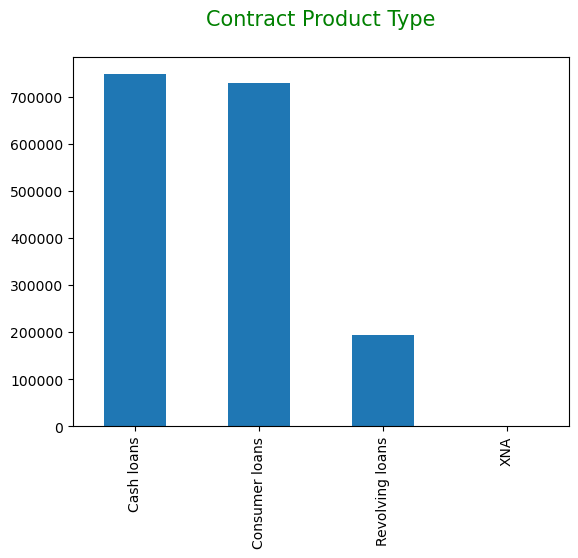

In [18]:
df1.NAME_CONTRACT_TYPE.value_counts().plot.bar()
plt.title('Contract Product Type\n',fontsize = 15,color = 'green')
plt.show()

###### Here we can see that the Cash loans and Consumers loan have the higghest value counts

In [19]:
df1.AMT_ANNUITY.value_counts()

2250.000     31865
11250.000    13974
6750.000     13442
9000.000     12496
22500.000    11903
             ...  
3794.445         1
8723.160         1
27948.330        1
25374.285        1
14704.290        1
Name: AMT_ANNUITY, Length: 357959, dtype: int64

In [20]:
df1.AMT_ANNUITY.describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

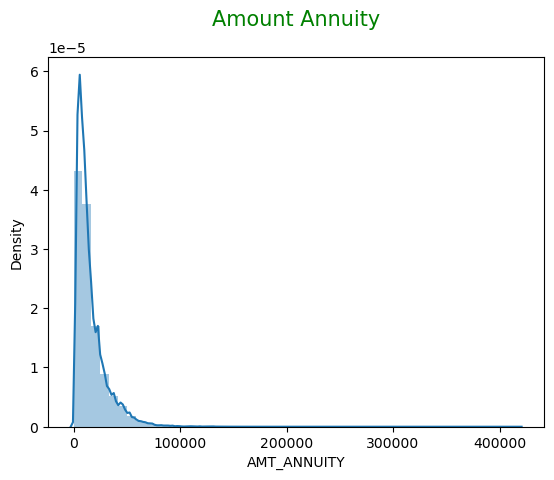

In [21]:
sns.distplot(df1.AMT_ANNUITY)
plt.title('Amount Annuity\n',fontsize = 15,color = 'green')
plt.show()

In [22]:
df1.AMT_APPLICATION.value_counts()

0.00         392402
45000.00      47831
225000.00     43543
135000.00     40678
450000.00     38905
              ...  
185292.00         1
225054.00         1
156212.55         1
99896.31          1
267295.50         1
Name: AMT_APPLICATION, Length: 93885, dtype: int64

In [23]:
df1.AMT_APPLICATION.describe()

count    1.670214e+06
mean     1.752339e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

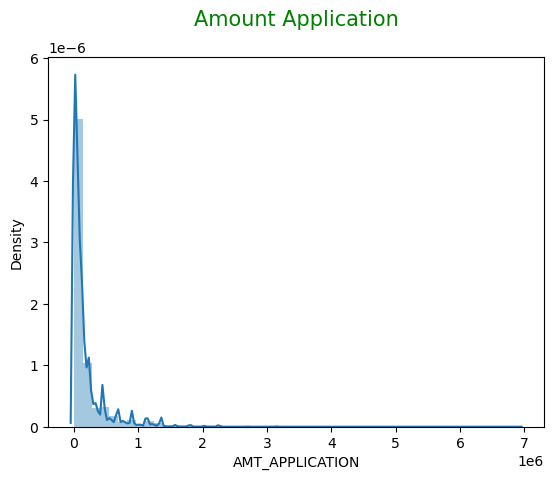

In [24]:
sns.distplot(df1.AMT_APPLICATION)
plt.title('Amount Application\n',fontsize = 15,color = 'green')
plt.show()

In [25]:
df1.AMT_CREDIT.value_counts()

0.00         336768
45000.00      35051
225000.00     21094
450000.00     19954
135000.00     18720
              ...  
262768.50         1
354213.00         1
438817.50         1
253111.50         1
436370.22         1
Name: AMT_CREDIT, Length: 86803, dtype: int64

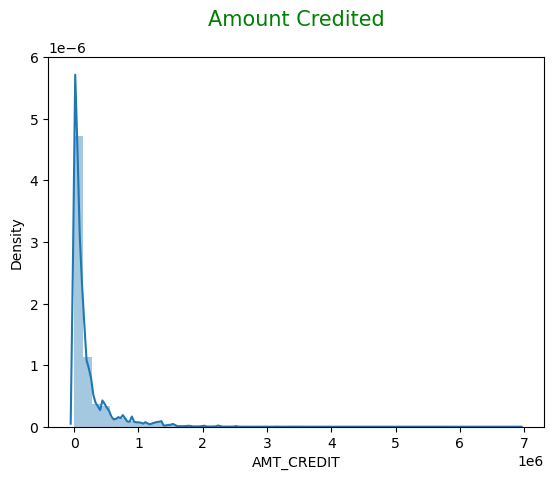

In [26]:
sns.distplot(df1.AMT_CREDIT)
plt.title('Amount Credited\n',fontsize = 15,color = 'green')
plt.show()

In [27]:
df1.AMT_CREDIT.value_counts().head(100)

0.0          336768
45000.0       35051
225000.0      21094
450000.0      19954
135000.0      18720
180000.0      17085
90000.0       13781
270000.0       9842
900000.0       7432
67500.0        7245
95940.0        6449
143910.0       6386
157500.0       6237
112500.0       5938
675000.0       5348
239850.0       5229
254700.0       4863
765000.0       4779
71955.0        4530
47970.0        4508
512370.0       3802
491580.0       3800
360000.0       3781
1350000.0      3763
202500.0       3761
337500.0       3672
46485.0        3577
152820.0       3464
191880.0       3316
533160.0       3313
315000.0       3218
148365.0       3044
119925.0       2816
269550.0       2653
405000.0       2611
247275.0       2597
203760.0       2505
247500.0       2480
767664.0       2445
470790.0       2421
585000.0       2358
1546020.0      2335
744498.0       2277
540000.0       2167
197820.0       2136
92970.0        2116
1125000.0      2087
69727.5        1926
241920.0       1918
139455.0       1776


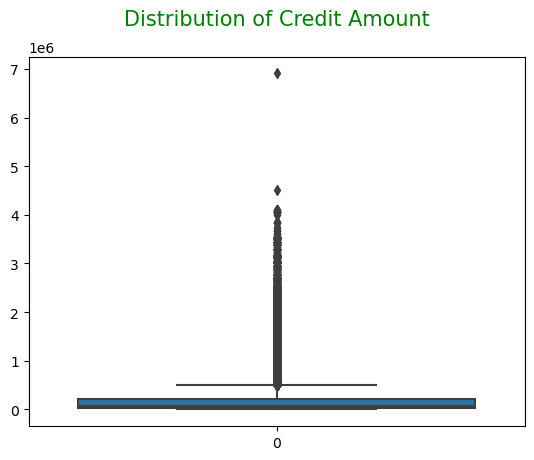

In [28]:
sns.boxplot(df1.AMT_CREDIT)
plt.title('Distribution of Credit Amount\n',fontsize = 15,color = 'green')
plt.show()

In [29]:
df1.AMT_GOODS_PRICE.value_counts()

45000.00     47831
225000.00    43549
135000.00    40666
450000.00    38926
90000.00     29367
             ...  
185292.00        1
225054.00        1
156212.55        1
99896.31         1
267295.50        1
Name: AMT_GOODS_PRICE, Length: 93885, dtype: int64

In [30]:
df1.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

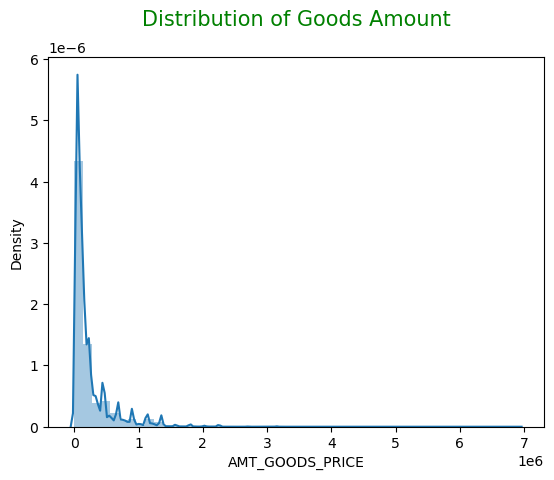

In [31]:
sns.distplot(df1.AMT_GOODS_PRICE)
plt.title('Distribution of Goods Amount\n',fontsize = 15,color = 'green')
plt.show()

In [32]:
df1.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

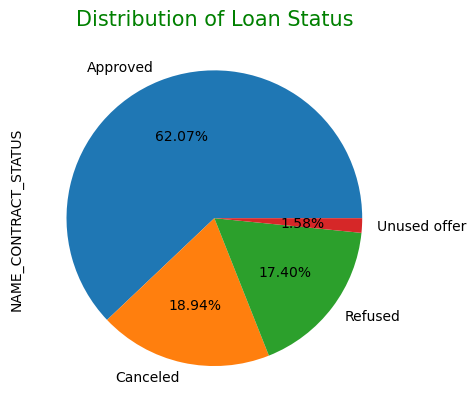

In [33]:
df1.NAME_CONTRACT_STATUS.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 10, 'color' : 'Black'})
plt.title('Distribution of Loan Status',fontsize = 15,color = 'green')
plt.show()

In [34]:
df1.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [35]:
df1.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144985
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
28.0         8
29.0         8
32.0         6
19.0         6
34.0         4
59.0         4
41.0         3
47.0         3
45.0         3
21.0         3
44.0         2
39.0         2
46.0         2
38.0         2
33.0         1
40.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

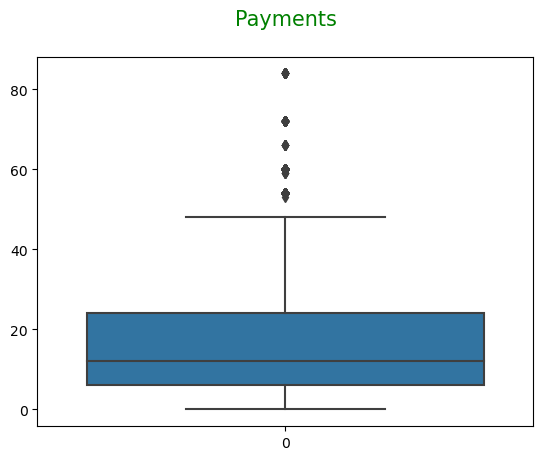

In [36]:
sns.boxplot(df1.CNT_PAYMENT)
plt.title('Payments\n',fontsize = 15,color = 'green')
plt.show()

In [37]:
df1.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

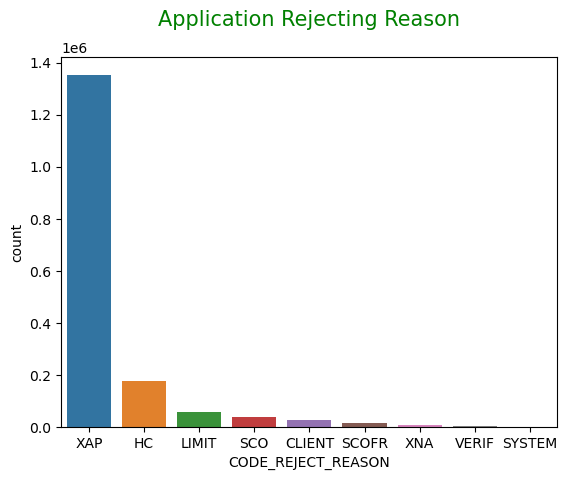

In [38]:
sns.countplot(x = df1.CODE_REJECT_REASON, order= df1.CODE_REJECT_REASON.value_counts().index )
plt.title('Application Rejecting Reason\n',fontsize = 15,color = 'green')
plt.show()

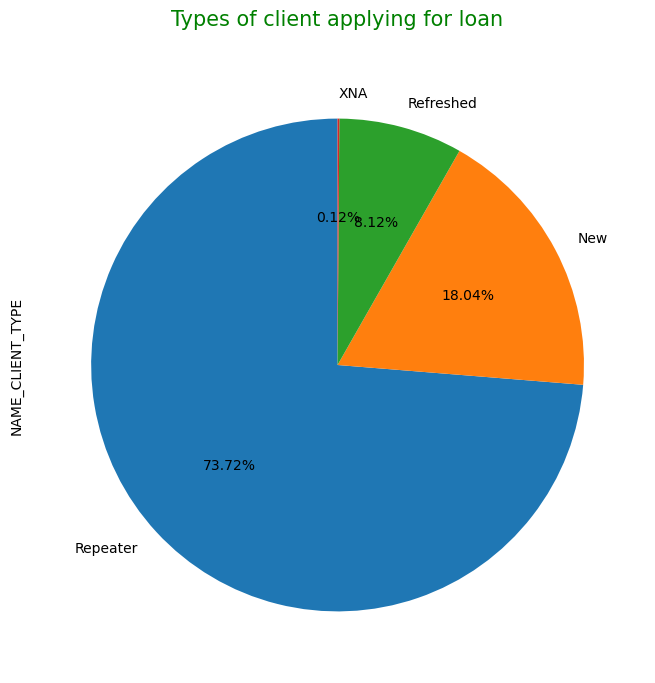

In [39]:
plt.figure(figsize = (12,8))
df1.NAME_CLIENT_TYPE.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 10, 'color' : 'Black'},startangle = 90)
plt.title('Types of client applying for loan\n',fontsize = 15,color = 'green')
plt.show()

##### Here we can see that more number of repeated clients are there applying for the loan, which clearly states that the client gets good feedback

In [40]:
df1.NAME_YIELD_GROUP.value_counts()

XNA           517215
middle        385532
high          353331
low_normal    322095
low_action     92041
Name: NAME_YIELD_GROUP, dtype: int64

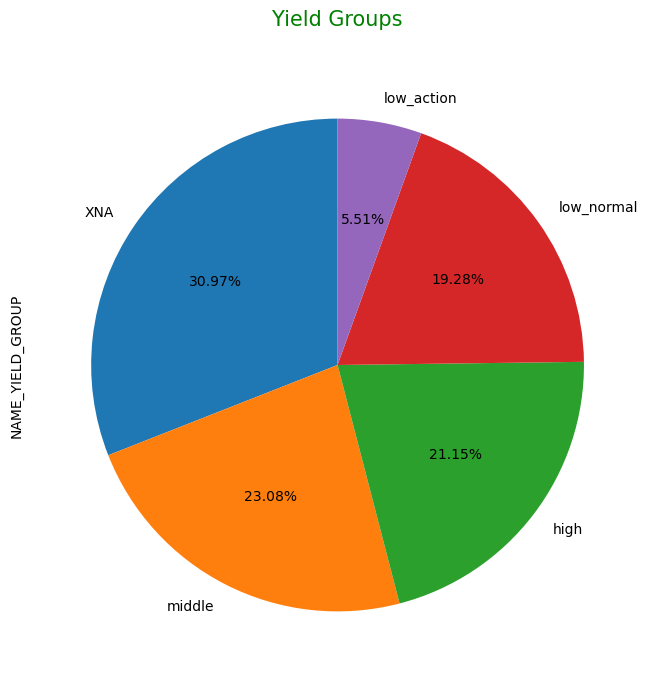

In [41]:
plt.figure(figsize = (12,8))
df1.NAME_YIELD_GROUP.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 10, 'color' : 'Black'},startangle = 90)
plt.title('Yield Groups\n',fontsize = 15,color = 'green')
plt.show()

In [42]:
df1.PRODUCT_COMBINATION.value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

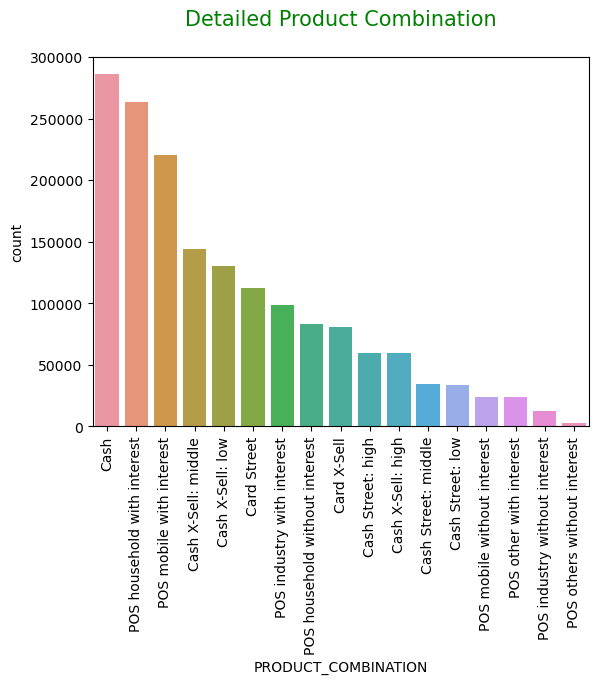

In [43]:
sns.countplot(x = df1.PRODUCT_COMBINATION,order = df1.PRODUCT_COMBINATION.value_counts().index)
plt.title('Detailed Product Combination\n',fontsize = 15,color = 'green')
plt.xticks(rotation = 90)
plt.show()

In [44]:
df1.DAYS_FIRST_DUE.value_counts()

 365243.0    40645
-334.0         772
-509.0         760
-208.0         751
-330.0         750
-292.0         746
-691.0         745
-270.0         744
-299.0         744
-327.0         743
-320.0         741
-264.0         738
-313.0         737
-328.0         733
-698.0         731
-488.0         730
-271.0         730
-508.0         729
-298.0         726
-329.0         724
-322.0         715
-333.0         714
-325.0         708
-326.0         707
-361.0         706
-265.0         705
-418.0         705
-324.0         703
-257.0         703
-242.0         701
-240.0         697
-516.0         696
-390.0         695
-342.0         694
-335.0         690
-600.0         690
-243.0         689
-453.0         688
-337.0         685
-209.0         685
-340.0         683
-482.0         683
-478.0         682
-201.0         682
-300.0         681
-670.0         680
-384.0         680
-383.0         679
-291.0         679
-331.0         679
-480.0         678
-332.0         677
-690.0      

<Axes: >

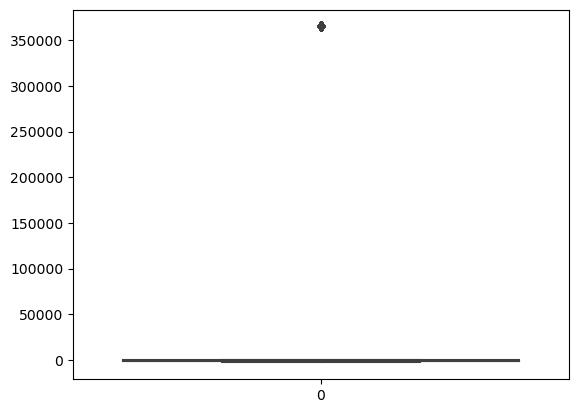

In [45]:
sns.boxplot(df1.DAYS_FIRST_DUE)

In [46]:
df1.DAYS_LAST_DUE_1ST_VERSION.value_counts()

 365243.0    93864
 9.0           720
 8.0           706
 0.0           705
 5.0           702
 10.0          698
 2.0           688
 6.0           685
 1.0           685
-1.0           675
-2.0           674
 3.0           672
-4.0           666
-7.0           662
 4.0           656
-12.0          656
-8.0           651
-3.0           647
 30.0          638
 11.0          636
-10.0          631
 33.0          630
 16.0          629
-6.0           624
 32.0          621
 37.0          621
 13.0          621
 17.0          619
 26.0          615
 31.0          615
 38.0          615
 19.0          614
 7.0           613
-11.0          609
-9.0           606
 12.0          602
-16.0          602
 39.0          596
 15.0          594
 29.0          594
 24.0          591
-5.0           591
 14.0          588
-21.0          587
 60.0          587
 34.0          585
 36.0          582
 28.0          582
-14.0          581
-19.0          581
 23.0          580
-23.0          580
-13.0       

<Axes: >

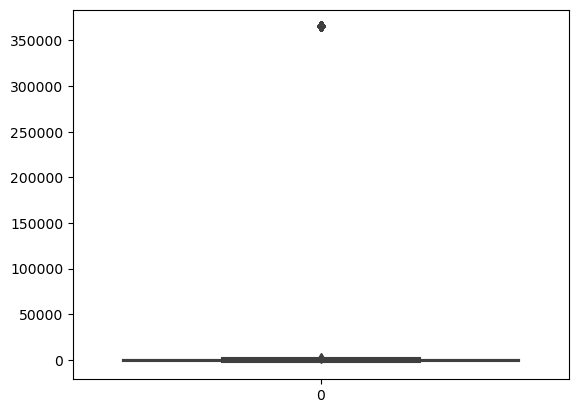

In [47]:
sns.boxplot(df1.DAYS_LAST_DUE_1ST_VERSION)

In [48]:
df1.DAYS_LAST_DUE.value_counts()

 365243.0    211221
-245.0          658
-188.0          650
-239.0          642
-167.0          638
-247.0          629
-305.0          627
-268.0          624
-160.0          623
-236.0          623
-308.0          620
-240.0          620
-153.0          617
-175.0          616
-171.0          616
-174.0          616
-243.0          615
-193.0          614
-333.0          613
-181.0          613
-211.0          613
-241.0          611
-185.0          611
-223.0          611
-184.0          611
-12.0           610
-320.0          610
-192.0          610
-164.0          609
-204.0          608
-232.0          608
-202.0          608
-275.0          606
-238.0          605
-234.0          605
-207.0          605
-248.0          605
-189.0          604
-231.0          604
-284.0          604
-242.0          603
-276.0          603
-134.0          603
-92.0           602
-244.0          602
-371.0          601
-216.0          601
-271.0          601
-217.0          601
-200.0          601


<Axes: >

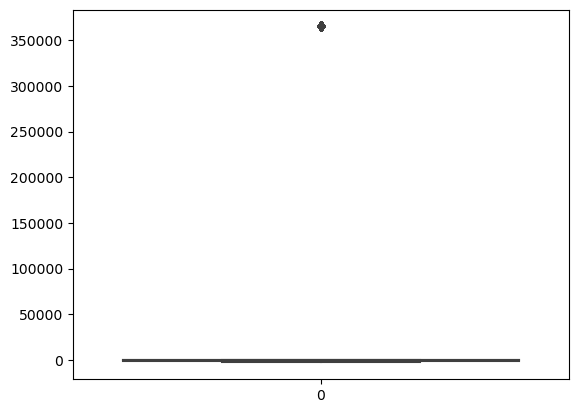

In [49]:
sns.boxplot(df1.DAYS_LAST_DUE)

In [50]:
df1.DAYS_TERMINATION.value_counts()

 365243.0    225913
-233.0          786
-170.0          770
-184.0          770
-163.0          769
-169.0          760
-303.0          754
-177.0          753
-305.0          742
-212.0          741
-156.0          740
-142.0          738
-149.0          736
-339.0          729
-304.0          727
-162.0          727
-261.0          727
-239.0          726
-190.0          726
-218.0          726
-247.0          724
-240.0          723
-198.0          723
-164.0          722
-246.0          722
-331.0          721
-171.0          721
-225.0          720
-155.0          720
-158.0          719
-236.0          719
-274.0          718
-128.0          718
-192.0          718
-319.0          716
-275.0          716
-241.0          715
-282.0          714
-205.0          714
-107.0          714
-176.0          711
-165.0          711
-9.0            711
-219.0          710
-23.0           708
-58.0           707
-242.0          706
-214.0          706
-185.0          705
-157.0          703


<Axes: >

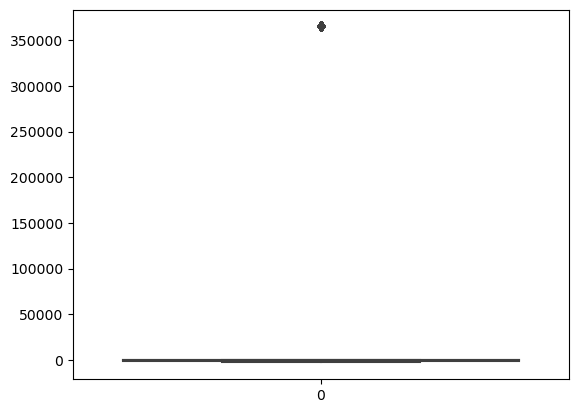

In [51]:
sns.boxplot(df1.DAYS_TERMINATION)

##### Bivarient and Multivarient Analysis

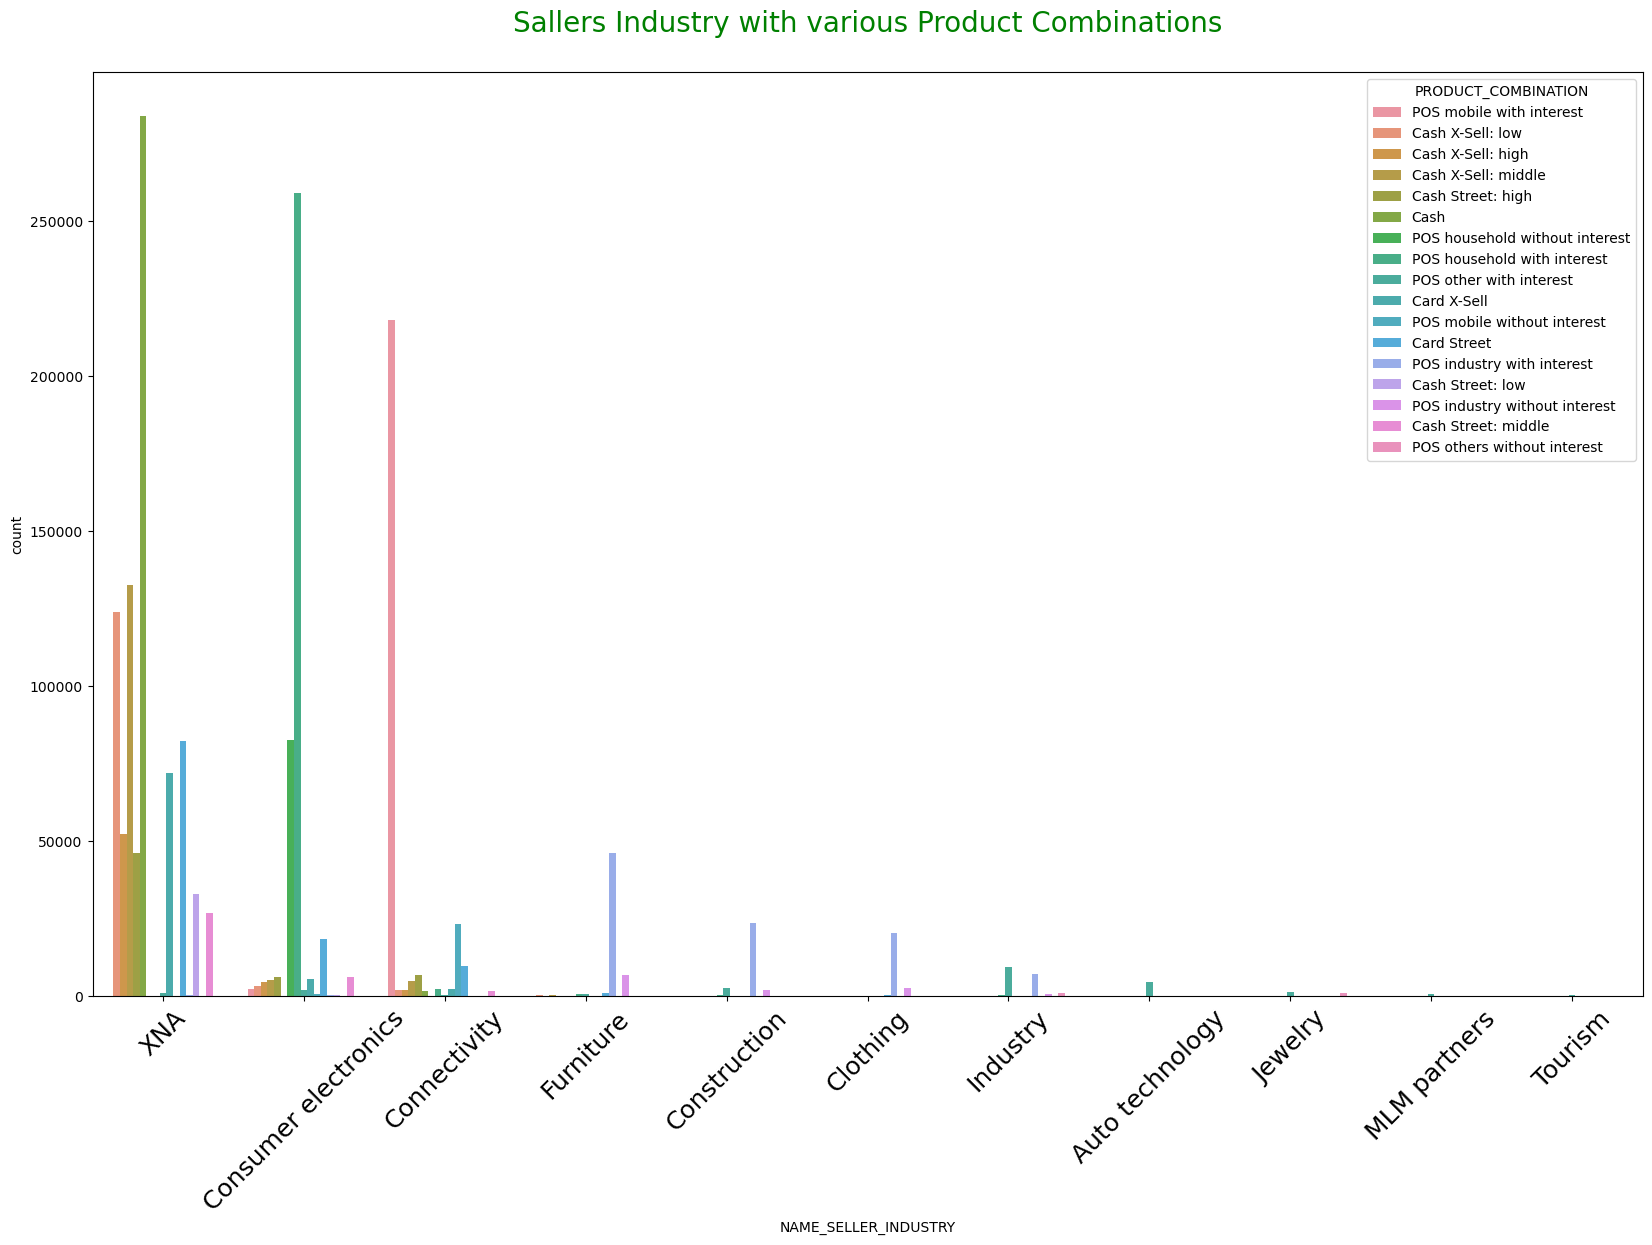

In [52]:
plt.figure(figsize = (20,12))
sns.countplot(data = df1, x= 'NAME_SELLER_INDUSTRY', order=df1['NAME_SELLER_INDUSTRY'].value_counts().index,hue = 'PRODUCT_COMBINATION')   
plt.xticks(rotation=45,fontsize = 18)
plt.title('Sallers Industry with various Product Combinations\n',fontsize = 20,color = 'green')
plt.show()

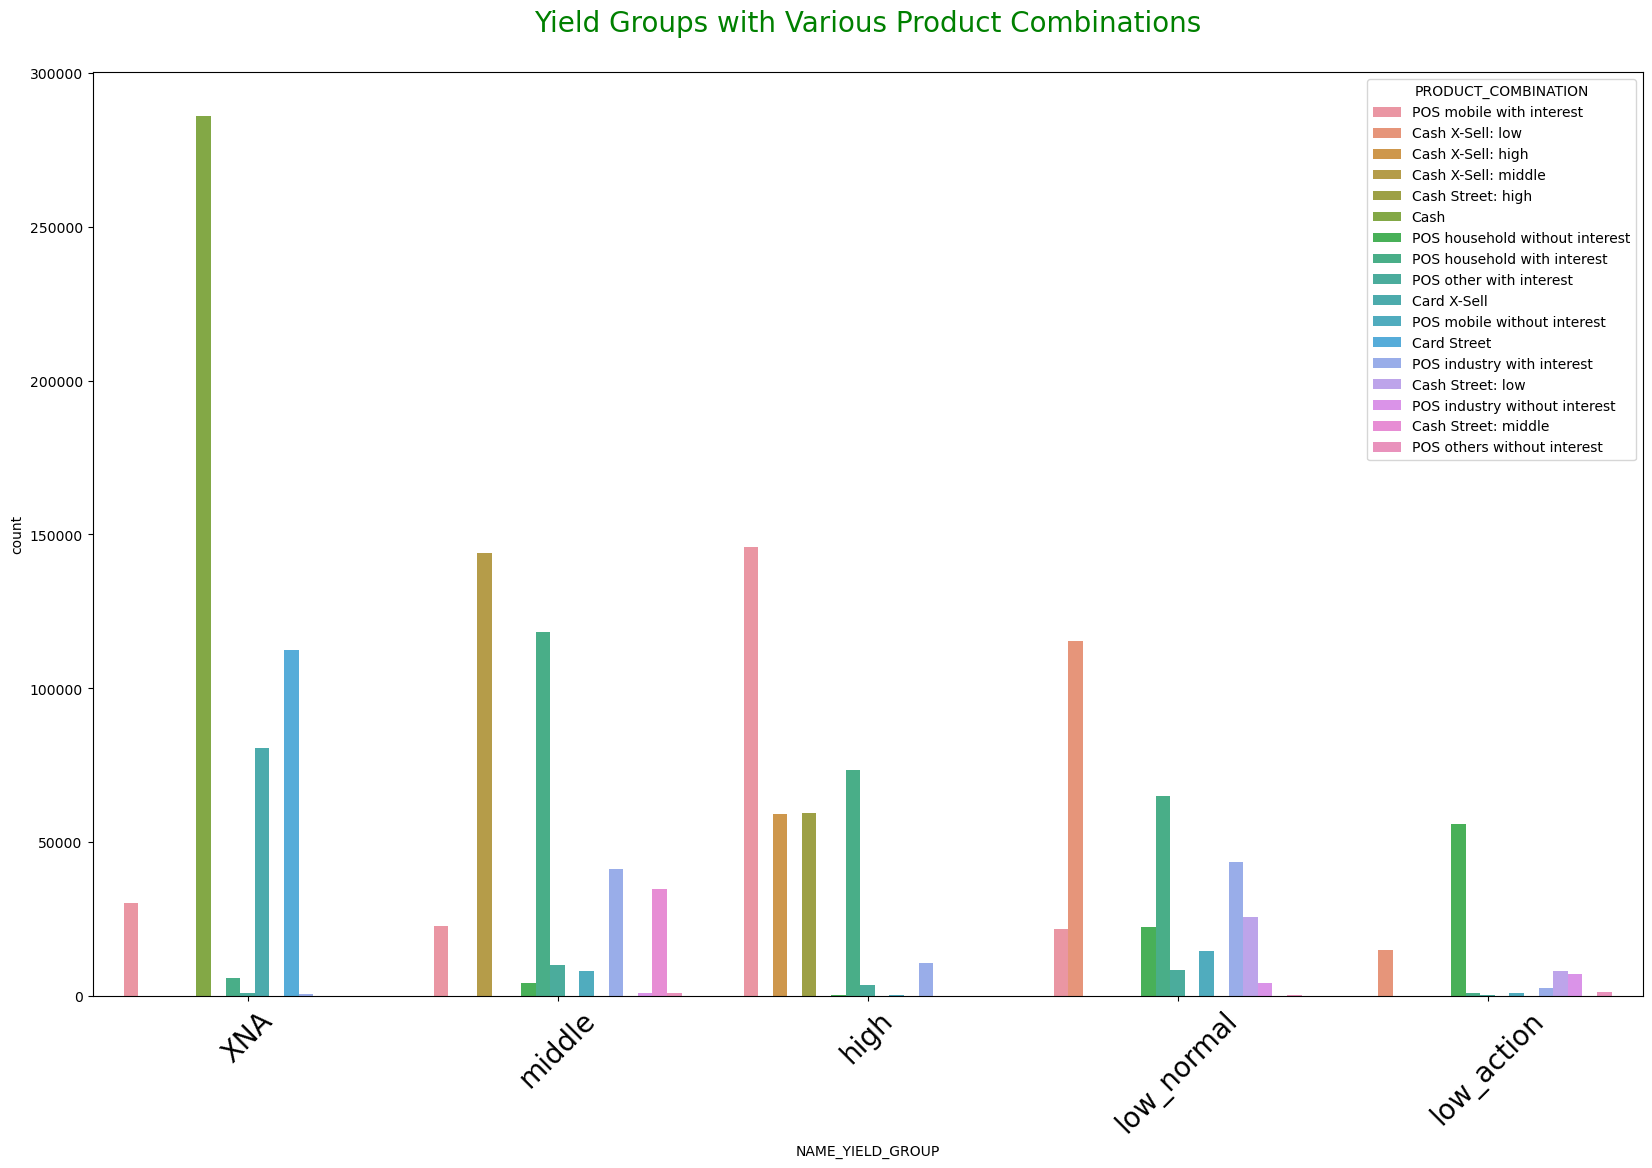

In [53]:
plt.figure(figsize = (20,12))
sns.countplot(data = df1, x= 'NAME_YIELD_GROUP', order=df1['NAME_YIELD_GROUP'].value_counts().index,hue = 'PRODUCT_COMBINATION')   
plt.xticks(rotation=45,fontsize = 20)
plt.title('Yield Groups with Various Product Combinations\n',fontsize = 20,color = 'green')

plt.show()

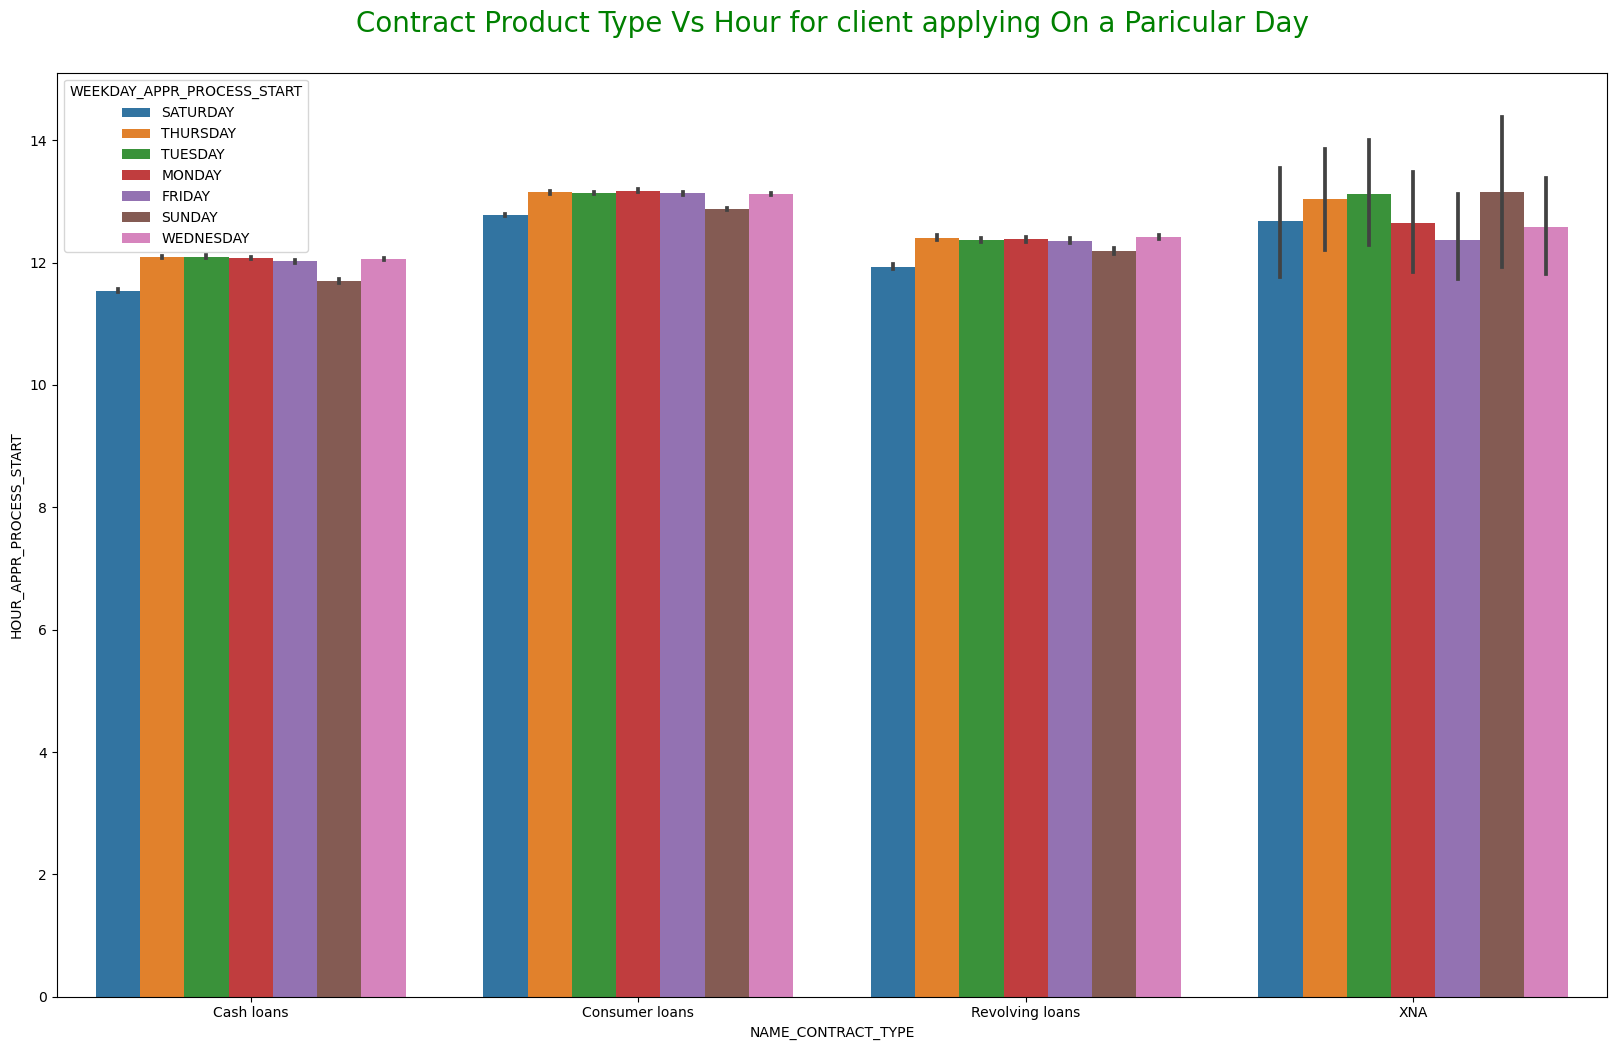

In [54]:
plt.figure(figsize = (20,12))
sns.barplot(data = df1, x= 'NAME_CONTRACT_TYPE', y = 'HOUR_APPR_PROCESS_START', order=df1['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'WEEKDAY_APPR_PROCESS_START')   
plt.title('Contract Product Type Vs Hour for client applying On a Paricular Day\n',fontsize = 20,color = 'green')
plt.show()

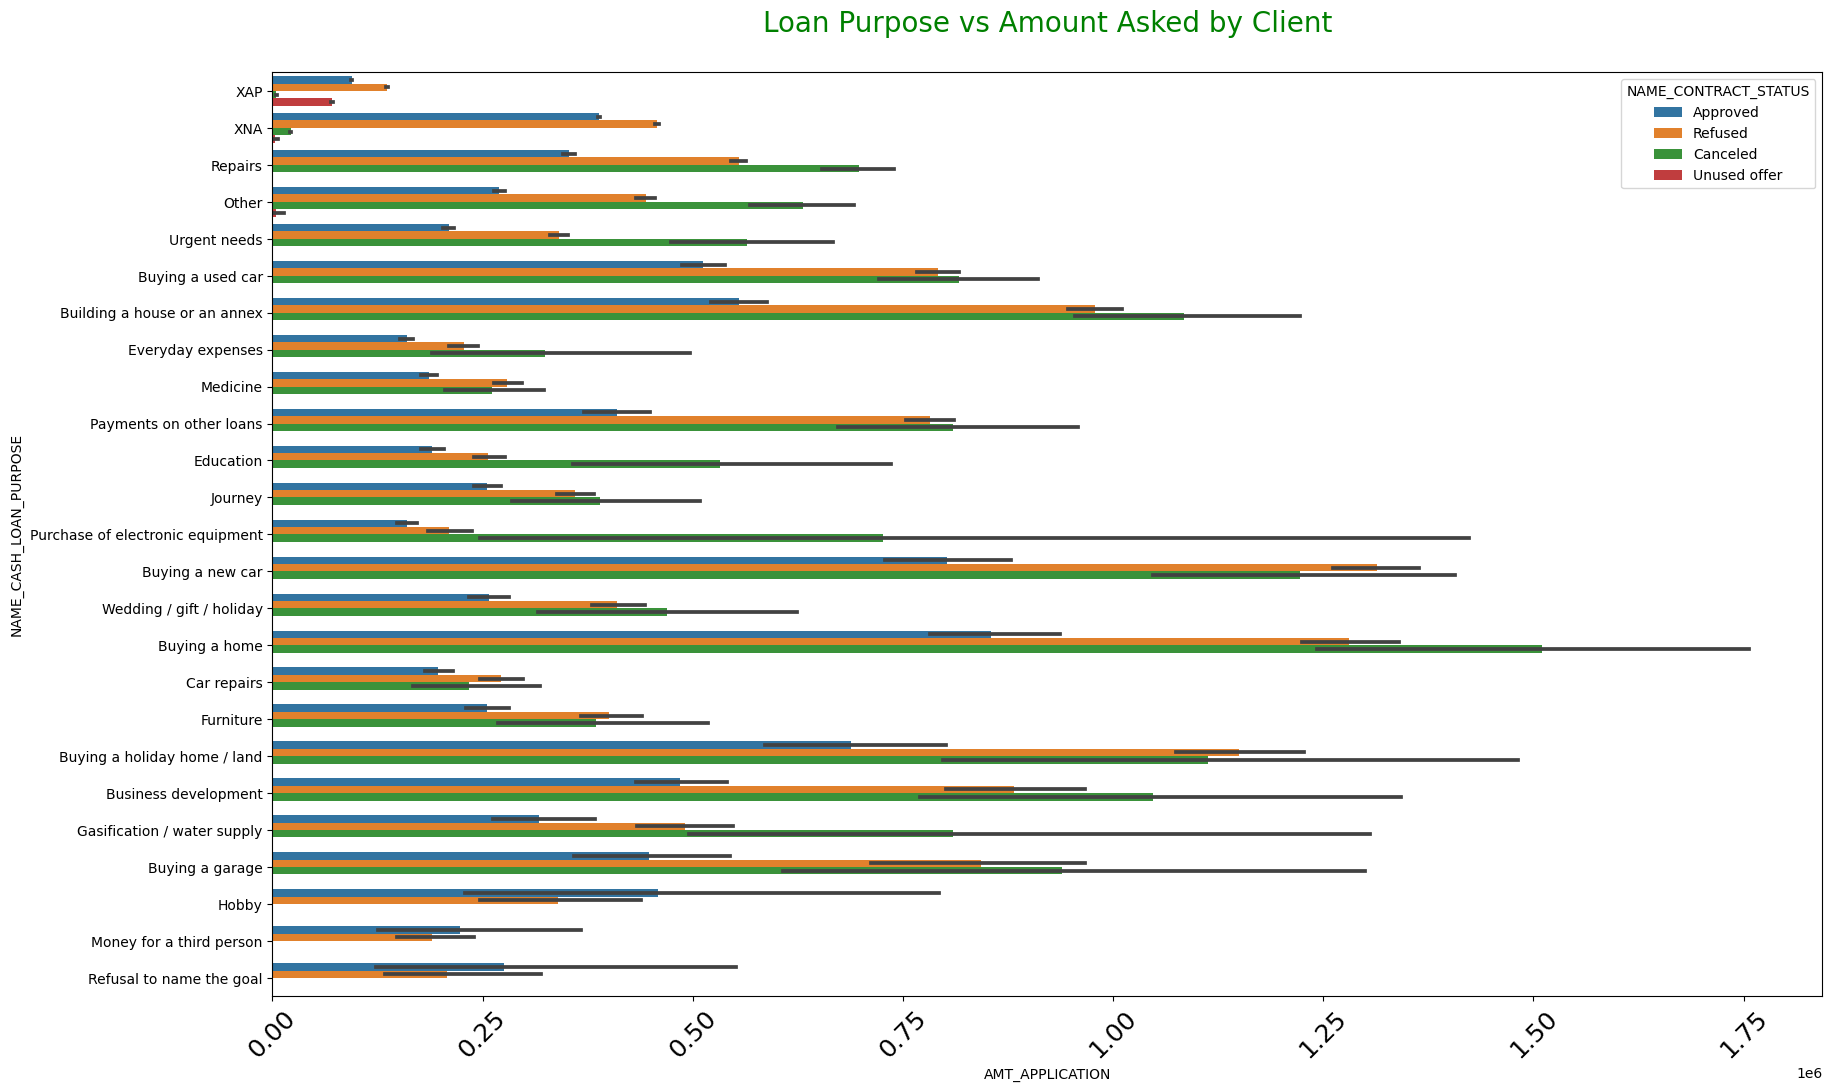

In [55]:
plt.figure(figsize = (20,12))
sns.barplot(data = df1, y = 'NAME_CASH_LOAN_PURPOSE',x = 'AMT_APPLICATION', order=df1['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS')   
plt.xticks(rotation=45,fontsize = 18)
plt.title('Loan Purpose vs Amount Asked by Client\n',fontsize = 20,color = 'green')
plt.show()

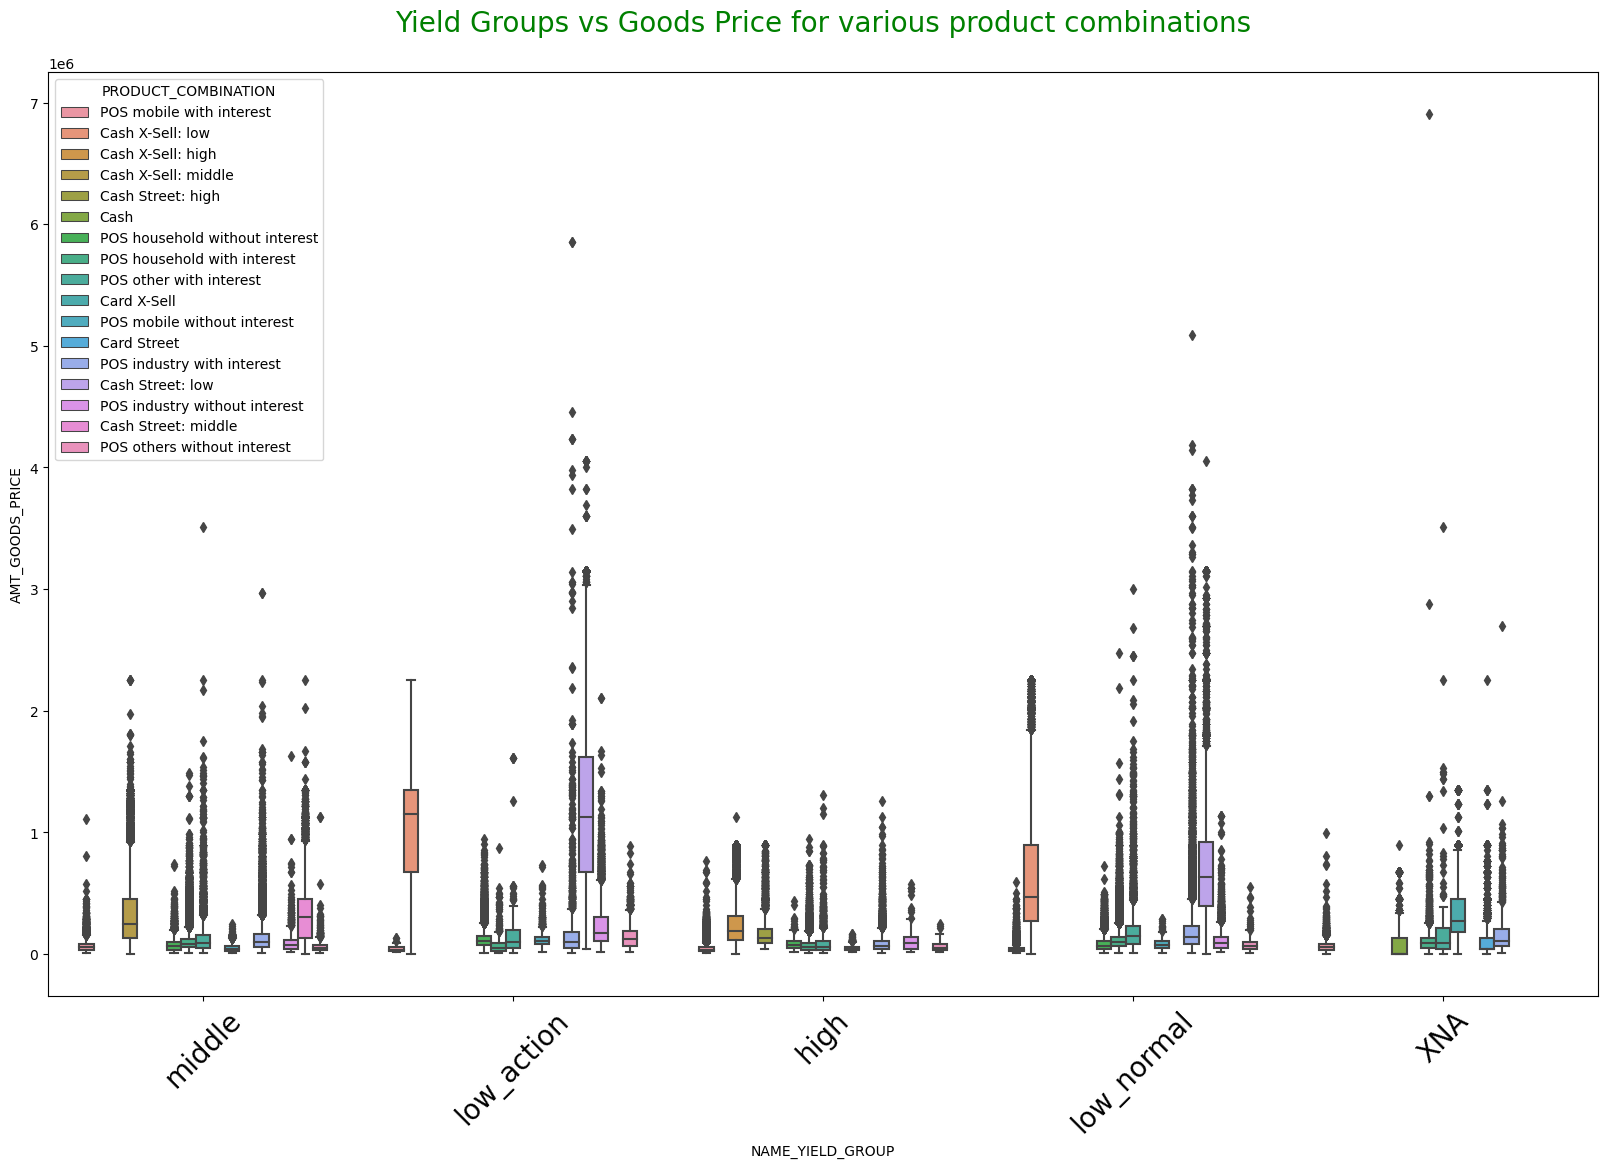

In [56]:
plt.figure(figsize = (20,12))
sns.boxplot(data = df1, x= 'NAME_YIELD_GROUP', y ='AMT_GOODS_PRICE' ,hue = 'PRODUCT_COMBINATION')   
plt.xticks(rotation=45,fontsize = 20)
plt.title('Yield Groups vs Goods Price for various product combinations\n',fontsize = 20,color = 'green')
plt.show()

In [57]:
df1.corr()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  \
SK_ID_PREV                   1.000000   -0.000321     0.011459   
SK_ID_CURR                  -0.000321    1.000000     0.000577   
AMT_ANNUITY                  0.011459    0.000577     1.000000   
AMT_APPLICATION              0.003302    0.000280     0.808872   
AMT_CREDIT                   0.003659    0.000195     0.816429   
AMT_GOODS_PRICE              0.015293    0.000369     0.820895   
HOUR_APPR_PROCESS_START     -0.002652    0.002842    -0.036201   
NFLAG_LAST_APPL_IN_DAY      -0.002828    0.000098     0.020639   
DAYS_DECISION                0.019100   -0.000637     0.279051   
SELLERPLACE_AREA            -0.001079    0.001265    -0.015027   
CNT_PAYMENT                  0.015589    0.000031     0.394535   
DAYS_FIRST_DRAWING          -0.001478   -0.001329     0.052839   
DAYS_FIRST_DUE              -0.000071   -0.000757    -0.053295   
DAYS_LAST_DUE_1ST_VERSION    0.001222    0.000252    -0.068877   
DAYS_LAST_DUE                0.001915   -0.000318     0.082659   
DAYS_TERMINATION             0.001781   -0.000020     0.068022   
NFLAG_INSURED_ON_APPROVAL    0.003986    0.000876     0.283080   

                           AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
SK_ID_PREV                        0.003302    0.003659         0.015293   
SK_ID_CURR                        0.000280    0.000195         0.000369   
AMT_ANNUITY                       0.808872    0.816429         0.820895   
AMT_APPLICATION                   1.000000    0.975824         0.999884   
AMT_CREDIT                        0.975824    1.000000         0.993087   
AMT_GOODS_PRICE                   0.999884    0.993087         1.000000   
HOUR_APPR_PROCESS_START          -0.014415   -0.021039        -0.045267   
NFLAG_LAST_APPL_IN_DAY            0.004310   -0.025179        -0.017100   
DAYS_DECISION                     0.133660    0.133763         0.290422   
SELLERPLACE_AREA                 -0.007649   -0.009567        -0.015842   
CNT_PAYMENT                       0.680630    0.674278         0.672129   
DAYS_FIRST_DRAWING                0.074544   -0.036813        -0.024445   
DAYS_FIRST_DUE                   -0.049532    0.002881        -0.021062   
DAYS_LAST_DUE_1ST_VERSION        -0.084905    0.044031         0.016883   
DAYS_LAST_DUE                     0.172627    0.224829         0.211696   
DAYS_TERMINATION                  0.148618    0.214320         0.209296   
NFLAG_INSURED_ON_APPROVAL         0.259219    0.263932         0.243400   

                           HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  \
SK_ID_PREV                               -0.002652               -0.002828   
SK_ID_CURR                                0.002842                0.000098   
AMT_ANNUITY                              -0.036201                0.020639   
AMT_APPLICATION                          -0.014415                0.004310   
AMT_CREDIT                               -0.021039               -0.025179   
AMT_GOODS_PRICE                          -0.045267               -0.017100   
HOUR_APPR_PROCESS_START                   1.000000                0.005789   
NFLAG_LAST_APPL_IN_DAY                    0.005789                1.000000   
DAYS_DECISION                            -0.039962                0.016555   
SELLERPLACE_AREA                          0.015671                0.000912   
CNT_PAYMENT                              -0.055511                0.063347   
DAYS_FIRST_DRAWING                        0.014321               -0.000409   
DAYS_FIRST_DUE                           -0.002797               -0.002288   
DAYS_LAST_DUE_1ST_VERSION                -0.016567               -0.001981   
DAYS_LAST_DUE                            -0.018018               -0.002277   
DAYS_TERMINATION                         -0.018254               -0.000744   
NFLAG_INSURED_ON_APPROVAL                -0.117318               -0.007124   

                           DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  \
SK_ID_P

<Axes: >

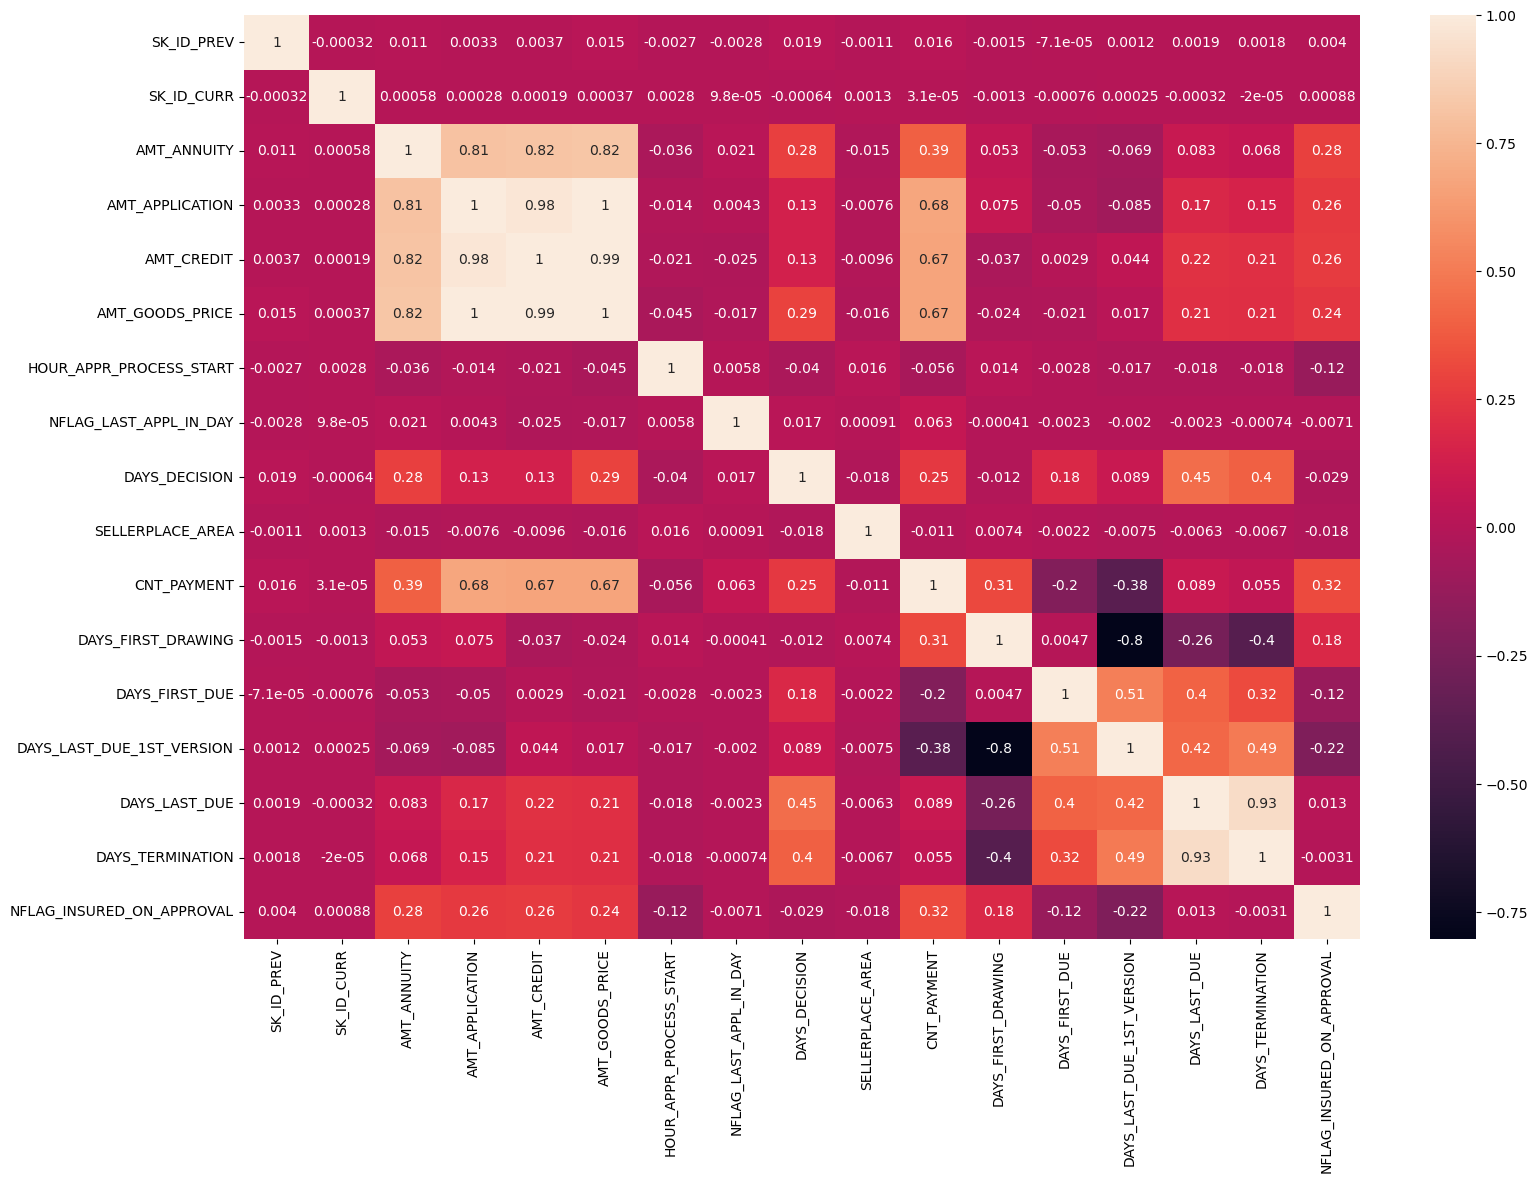

In [58]:
plt.figure(figsize = (18,12))
sns.heatmap(df1.corr(),annot = True)

### Looking for Application Data

In [59]:
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [60]:
df2.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [62]:
100*(df2.isnull().sum()/len(df2.index))

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

#### Removing columns with missing values more then 40%

In [63]:
df2.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE","OCCUPATION_TYPE"],
         axis=1,inplace = True)

In [64]:
df2 = df2[~(df2.CODE_GENDER == "XNA")]

In [65]:
df2.CODE_GENDER.value_counts()

F    202448
M    105059
Name: CODE_GENDER, dtype: int64

In [66]:
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [67]:
df2.shape

(307507, 73)

In [68]:
df2.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL  

In [69]:
df2.EXT_SOURCE_3.isnull().sum() 

60965

In [70]:
df2.EXT_SOURCE_3.value_counts()

0.746300    1460
0.713631    1315
0.694093    1276
0.670652    1191
0.652897    1154
0.581484    1141
0.689479    1138
0.595456    1136
0.554947    1132
0.621226    1109
0.657784    1092
0.607557    1067
0.643026    1066
0.450747    1064
0.626304    1054
0.673830    1030
0.651260    1029
0.511892    1026
0.706205     992
0.553165     984
0.593718     978
0.634706     969
0.740799     961
0.681706     959
0.565608     956
0.728141     953
0.771362     947
0.576209     943
0.586740     942
0.656158     931
0.631355     929
0.484851     922
0.709189     919
0.665855     912
0.684828     911
0.538863     911
0.617826     907
0.591977     904
0.513694     895
0.683269     895
0.579727     895
0.000527     886
0.733815     880
0.619528     879
0.501075     879
0.508287     877
0.754406     874
0.712155     867
0.832785     865
0.558507     864
0.524496     860
0.633032     854
0.659406     850
0.812823     849
0.636376     848
0.680139     837
0.474051     837
0.647977     837
0.546023     8

Getting the mean of all the three EXTERNAL SOURCES and storing in separate column

In [71]:
df2['EXT_SOURCE_1'] = df2['EXT_SOURCE_1'].replace(np.nan,0)
df2['EXT_SOURCE_3'] = df2['EXT_SOURCE_3'].replace(np.nan,0)
df2['EXT_SOURCE_2'] = df2['EXT_SOURCE_2'].replace(np.nan,0)

In [72]:
df2['EXT_SOURCE_1'] = ((df2['EXT_SOURCE_1'] + df2['EXT_SOURCE_2'] + df2['EXT_SOURCE_3'])/3)

In [73]:
df2.rename(columns = {'EXT_SOURCE_1':'EXT_SOURCE'},inplace = True)

In [74]:
df2.drop(['EXT_SOURCE_2','EXT_SOURCE_3'],axis = 1,inplace = True)

In [75]:
df2.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  CNT_FAM_MEMBERS  \
0                 1           1           0              1.0   
1                 1           1           0              2.0   
2                 1           1           0              1.0   
3                 1           0           0              2.0   
4                 1           0           0              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

   LIVE_REGION_

In [76]:
df2.EXT_SOURCE.value_counts()

0.000000    172
0.095299     94
0.088419     65
0.053226     61
0.087419     57
           ... 
0.391900      1
0.127707      1
0.434435      1
0.466150      1
0.518984      1
Name: EXT_SOURCE, Length: 300344, dtype: int64

<Axes: xlabel='TARGET', ylabel='EXT_SOURCE'>

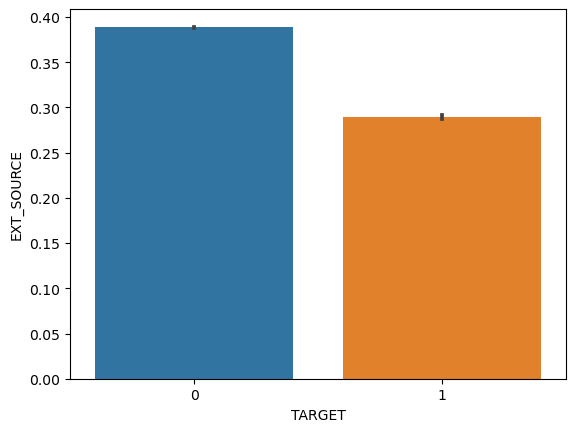

In [77]:
sns.barplot(y = df2.EXT_SOURCE, x= df2.TARGET)

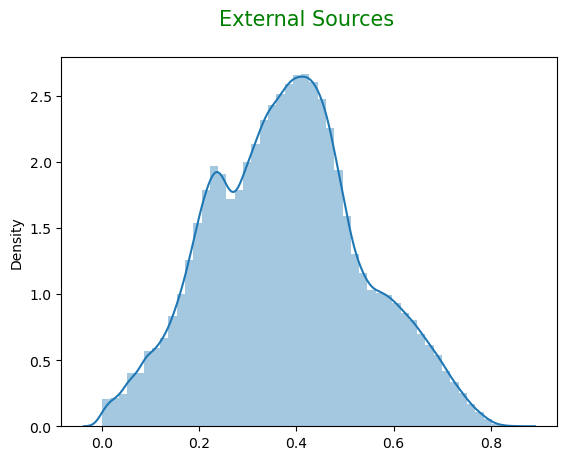

In [78]:
sns.distplot( x = df2['EXT_SOURCE'])
plt.title('External Sources \n',fontsize = 15,color = 'green')
plt.show()

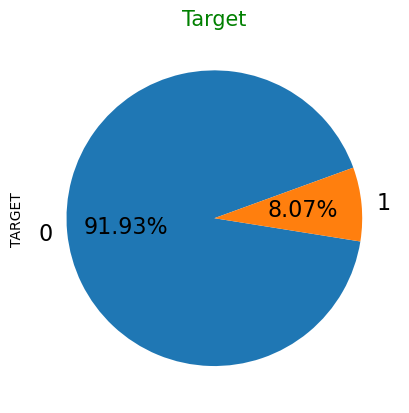

In [79]:
df2.TARGET.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'},startangle = 20)
plt.title('Target',fontsize = 15,color = 'green')
plt.show()

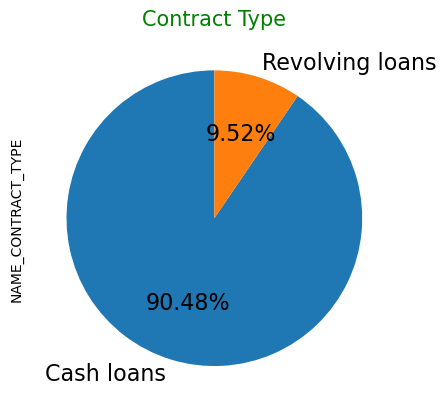

In [80]:
df2.NAME_CONTRACT_TYPE.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'},startangle = 90)
plt.title('Contract Type',fontsize = 15,color = 'green')
plt.show()

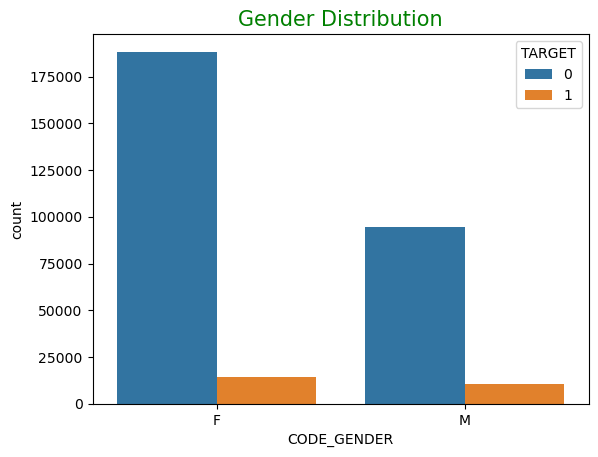

In [81]:
# df2.CODE_GENDER.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 16, 'fontweight' : 20, 'color' : 'Black'})
sns.countplot(x = df2.CODE_GENDER, order = df2.CODE_GENDER.value_counts().index,hue = df2.TARGET)
plt.title('Gender Distribution',fontsize = 15,color = 'green')
plt.show()

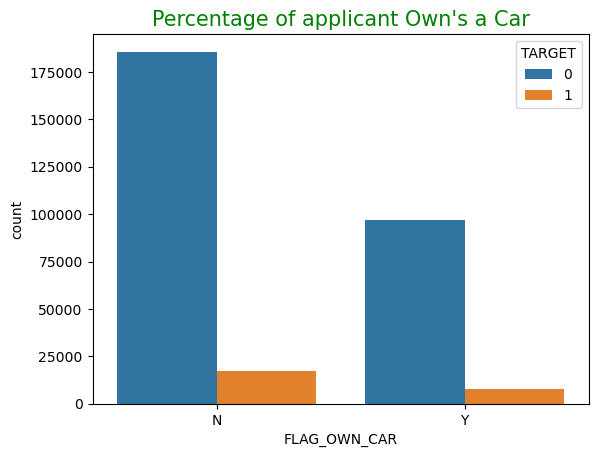

In [82]:
# df2.FLAG_OWN_CAR.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
sns.countplot(x = df2.FLAG_OWN_CAR, order = df2.FLAG_OWN_CAR.value_counts().index,hue = df2.TARGET)
plt.title('Percentage of applicant Own\'s a Car',fontsize = 15,color = 'green')
plt.show()

In [83]:
df2.AMT_INCOME_TOTAL.value_counts()

1.350000e+05    35749
1.125000e+05    31019
1.575000e+05    26555
1.800000e+05    24719
9.000000e+04    22483
2.250000e+05    20698
2.025000e+05    16341
6.750000e+04    11147
2.700000e+05    10827
8.100000e+04     6001
3.150000e+05     5862
2.475000e+05     5343
1.260000e+05     4668
3.600000e+05     4115
1.215000e+05     3848
9.900000e+04     3633
2.925000e+05     3418
1.035000e+05     3330
7.650000e+04     3146
1.440000e+05     3123
1.710000e+05     2647
4.500000e+05     2435
1.170000e+05     2390
5.400000e+04     2319
7.200000e+04     2187
1.665000e+05     2053
4.500000e+04     2043
1.080000e+05     1946
3.375000e+05     1790
9.450000e+04     1747
1.620000e+05     1702
1.890000e+05     1691
4.050000e+05     1660
8.550000e+04     1514
1.485000e+05     1486
2.160000e+05     1406
1.305000e+05     1256
5.850000e+04     1182
6.300000e+04     1145
1.935000e+05     1061
1.530000e+05     1012
2.115000e+05      985
3.825000e+05      966
1.395000e+05      834
1.755000e+05      800
5.400000e+

In [84]:
df2.AMT_INCOME_TOTAL.describe()

count    3.075070e+05
mean     1.687977e+05
std      2.371246e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

<Axes: >

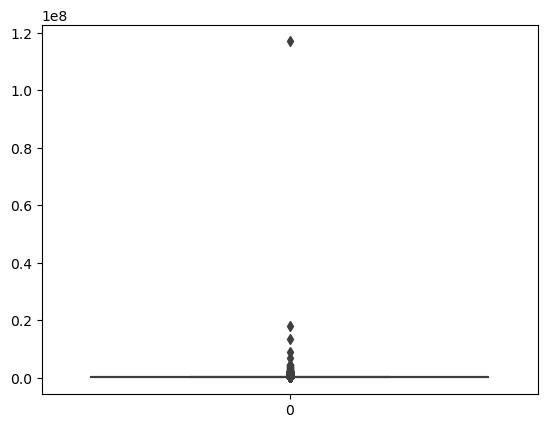

In [85]:
sns.boxplot(df2.AMT_INCOME_TOTAL)

In [86]:
df2.AMT_ANNUITY.value_counts()

9000.0      6385
13500.0     5513
6750.0      2279
10125.0     2035
37800.0     1602
            ... 
79902.0        1
106969.5       1
60885.0        1
59661.0        1
77809.5        1
Name: AMT_ANNUITY, Length: 13672, dtype: int64

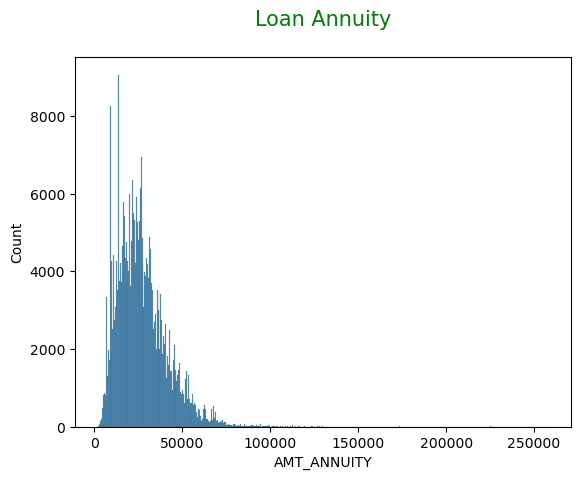

In [87]:
sns.histplot(df2.AMT_ANNUITY)
plt.title('Loan Annuity\n',fontsize = 15,color = 'green')
plt.show()

<Axes: xlabel='AMT_ANNUITY', ylabel='Density'>

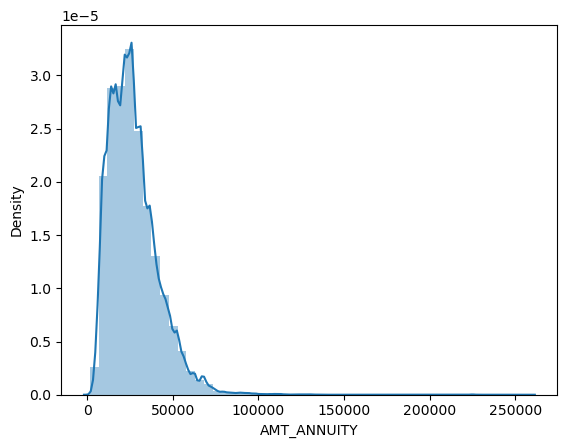

In [88]:
sns.distplot(df2.AMT_ANNUITY)

In [89]:
df2.AMT_CREDIT.value_counts()

450000.0     9709
675000.0     8877
225000.0     8162
180000.0     7342
270000.0     7240
900000.0     6246
254700.0     4500
545040.0     4437
808650.0     4152
135000.0     3660
755190.0     3524
1125000.0    3493
521280.0     3175
284400.0     3096
1078200.0    2856
454500.0     2649
1288350.0    2613
269550.0     2463
202500.0     2339
781920.0     2328
1350000.0    2321
239850.0     2084
315000.0     2072
247500.0     2057
640080.0     2041
1006920.0    1883
540000.0     1820
360000.0     1743
508495.5     1717
592560.0     1688
497520.0     1665
405000.0     1660
835380.0     1600
337500.0     1588
679500.0     1555
942300.0     1431
314100.0     1394
152820.0     1366
1546020.0    1279
495000.0     1268
157500.0     1203
585000.0     1200
728460.0     1065
526491.0     1012
544491.0     1009
343800.0      939
1223010.0     930
312768.0      929
247275.0      920
1800000.0     900
814041.0      897
630000.0      895
490495.5      842
101880.0      841
263686.5      827
760225.5  

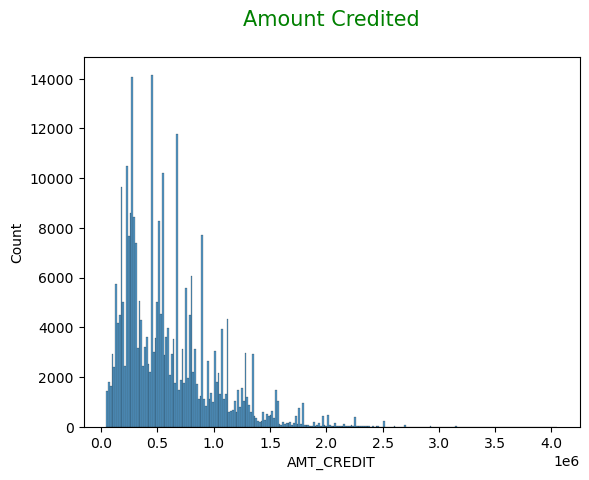

In [90]:
sns.histplot(df2.AMT_CREDIT)
plt.title('Amount Credited\n',fontsize = 15,color = 'green')
plt.show()

In [91]:
df2.AMT_GOODS_PRICE.value_counts()

450000.0     26022
225000.0     25280
675000.0     24962
900000.0     15415
270000.0     11428
180000.0     10123
454500.0      9157
1125000.0     9050
135000.0      8206
315000.0      5225
1350000.0     5037
679500.0      4824
238500.0      4696
360000.0      4553
247500.0      4318
463500.0      3873
540000.0      3763
495000.0      3463
202500.0      3222
90000.0       3169
405000.0      2954
472500.0      2828
157500.0      2704
585000.0      2647
337500.0      2500
229500.0      2438
112500.0      2170
630000.0      2164
1800000.0     2146
720000.0      1922
1575000.0     1875
688500.0      1824
292500.0      1708
148500.0      1674
477000.0      1611
810000.0      1568
67500.0       1505
697500.0      1408
382500.0      1396
765000.0      1396
904500.0      1375
283500.0      1372
252000.0      1368
234000.0      1279
45000.0       1169
945000.0      1161
855000.0      1113
1129500.0     1109
913500.0      1065
328500.0      1059
459000.0      1023
193500.0      1007
103500.0    

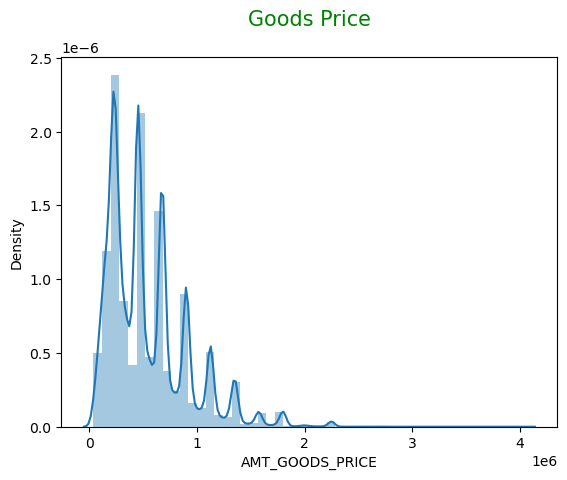

In [92]:
sns.distplot(df2.AMT_GOODS_PRICE)
plt.title('Goods Price\n',fontsize = 15,color = 'green')
plt.show()

In [93]:
df2.NAME_TYPE_SUITE.value_counts()

Unaccompanied      248523
Family              40148
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [94]:
df2.NAME_INCOME_TYPE.value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [95]:
df2.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218389
Higher education                  74862
Incomplete higher                 10276
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

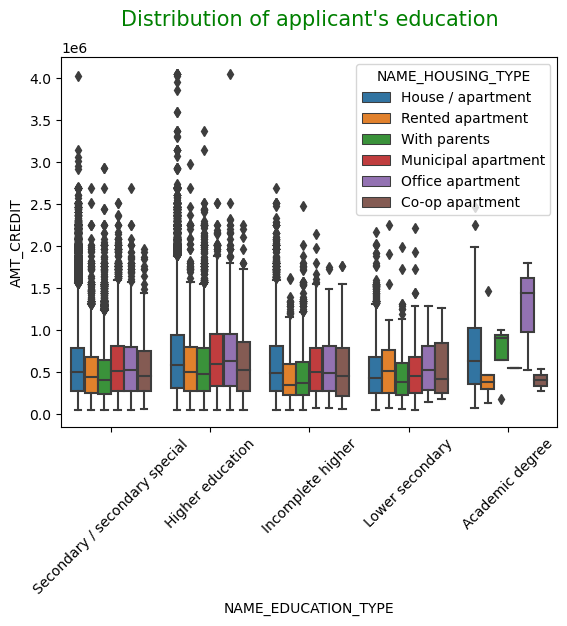

In [96]:
sns.boxplot(x =df2.NAME_EDUCATION_TYPE, y = df2.AMT_CREDIT, order = df2.NAME_EDUCATION_TYPE.value_counts().index, hue = df2.NAME_HOUSING_TYPE)
plt.title('Distribution of applicant\'s education\n',fontsize = 15,color = 'green')
plt.xticks(rotation = 45)
plt.show()

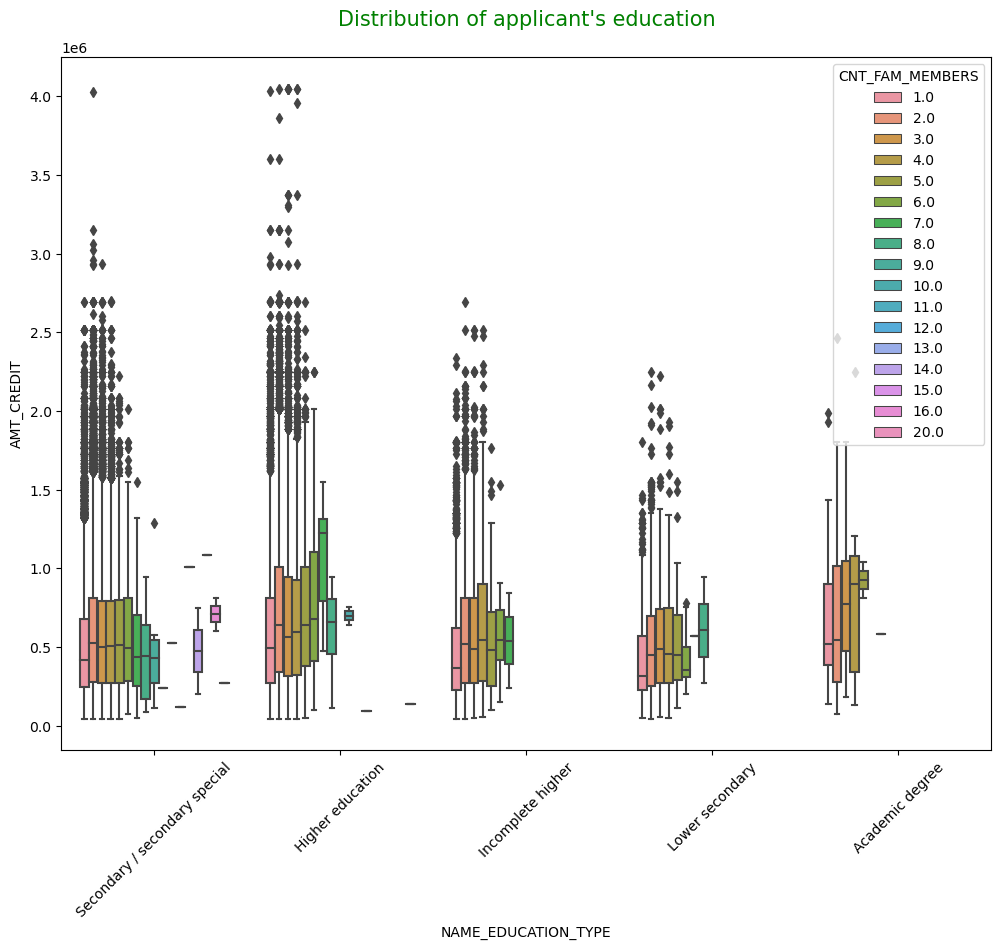

In [97]:
plt.figure(figsize = (12,9))
sns.boxplot(x =df2.NAME_EDUCATION_TYPE, y = df2.AMT_CREDIT, order = df2.NAME_EDUCATION_TYPE.value_counts().index, hue = df2.CNT_FAM_MEMBERS)
plt.title('Distribution of applicant\'s education\n',fontsize = 15,color = 'green')
plt.xticks(rotation = 45)
plt.show()

In [98]:
df2.NAME_FAMILY_STATUS.value_counts()

Married                 196429
Single / not married     45444
Civil marriage           29774
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

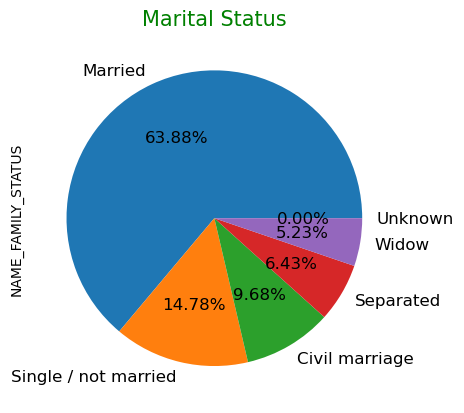

In [99]:
df2.NAME_FAMILY_STATUS.value_counts().plot.pie(autopct = "%1.2f%%", textprops={'fontsize': 12, 'fontweight' : 20, 'color' : 'Black'})
plt.title('Marital Status',fontsize = 15,color = 'green')
plt.show()

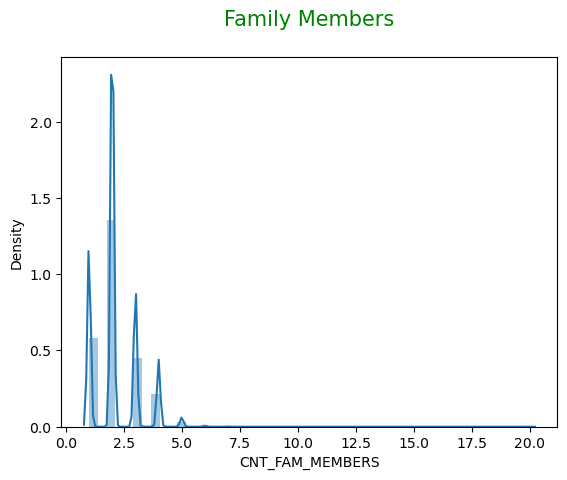

In [100]:
sns.distplot(df2.CNT_FAM_MEMBERS)
plt.title('Family Members\n',fontsize = 15,color = 'green')
plt.show()

In [101]:
df2.REGION_RATING_CLIENT_W_CITY.value_counts()

2    229481
3     43859
1     34167
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64

<Axes: xlabel='REGION_RATING_CLIENT_W_CITY', ylabel='Density'>

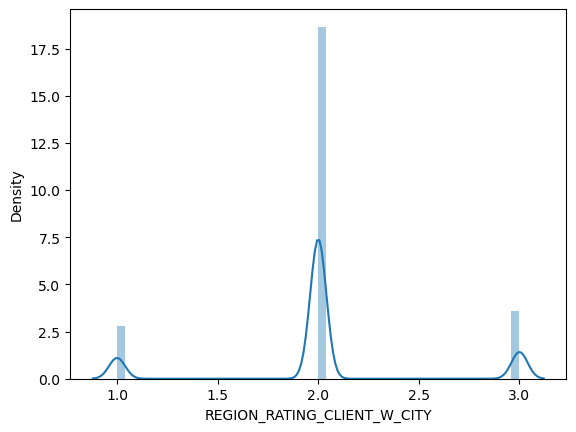

In [102]:
sns.distplot(df2.REGION_RATING_CLIENT_W_CITY)


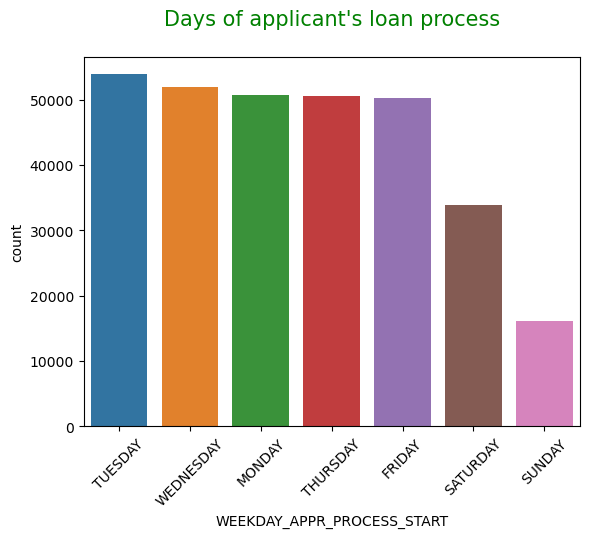

In [103]:
sns.countplot(x =df2.WEEKDAY_APPR_PROCESS_START , order = df2.WEEKDAY_APPR_PROCESS_START.value_counts().index)
plt.title('Days of applicant\'s loan process\n',fontsize = 15,color = 'green')
plt.xticks(rotation = 45)
plt.show()

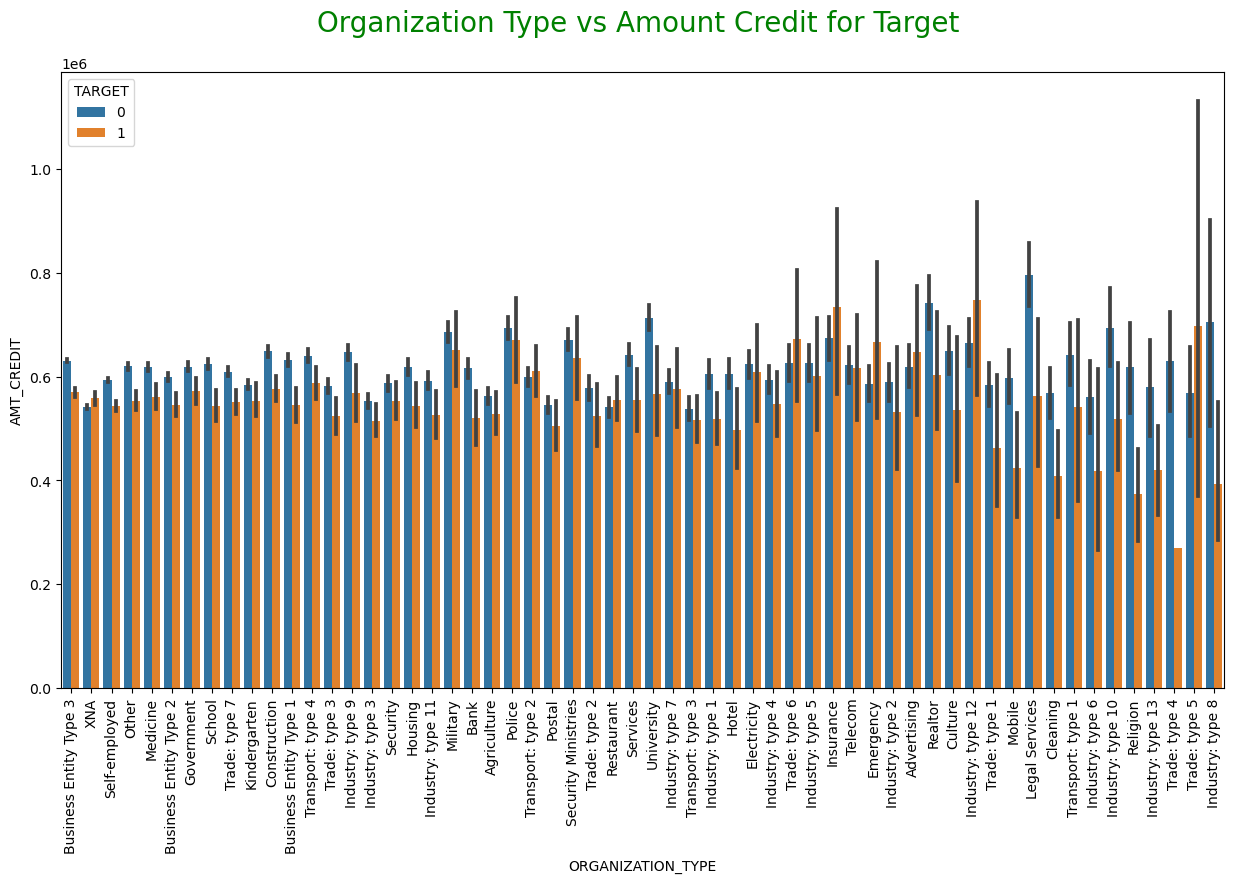

In [104]:
plt.figure(figsize = (15,8))
sns.barplot(x = df2.ORGANIZATION_TYPE,y = df2.AMT_CREDIT, order = df2.ORGANIZATION_TYPE.value_counts().index,hue = df2.TARGET)
plt.xticks(rotation = 90)
plt.title('Organization Type vs Amount Credit for Target \n',fontsize = 20,color = 'green')
plt.show()

In [105]:
df2.DAYS_LAST_PHONE_CHANGE.value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
-5.0         824
-6.0         537
-7.0         442
-8.0         278
-476.0       222
-352.0       213
-392.0       211
-364.0       209
-479.0       204
-358.0       203
-329.0       203
-293.0       202
-350.0       201
-441.0       200
-399.0       200
-404.0       199
-9.0         198
-463.0       198
-11.0        198
-301.0       197
-362.0       195
-304.0       195
-496.0       195
-308.0       195
-483.0       195
-500.0       194
-355.0       194
-427.0       193
-391.0       193
-334.0       193
-448.0       192
-347.0       192
-413.0       191
-415.0       191
-447.0       190
-469.0       190
-546.0       190
-499.0       189
-353.0       188
-566.0       188
-428.0       187
-420.0       187
-417.0       186
-315.0       186
-475.0       186
-574.0       186
-454.0       185
-511.0       185
-484.0       185
-296.0       185
-534.0       185
-509.0       184
-609.0       183
-291.0       1

<Axes: xlabel='DAYS_LAST_PHONE_CHANGE', ylabel='Density'>

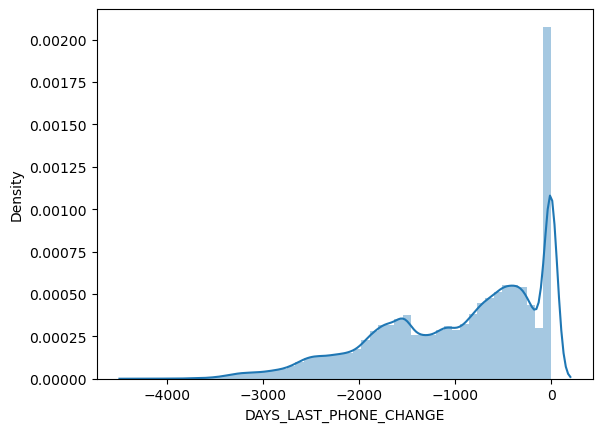

In [106]:
sns.distplot(df2.DAYS_LAST_PHONE_CHANGE)

<Axes: >

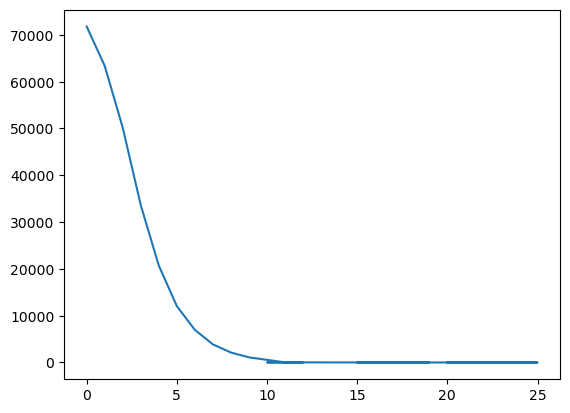

In [107]:
df2.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts().plot()

###### Multivarient analysis for Previous Applications

In [108]:
df2.NAME_INCOME_TYPE.value_counts()

Working                 158771
Commercial associate     71616
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

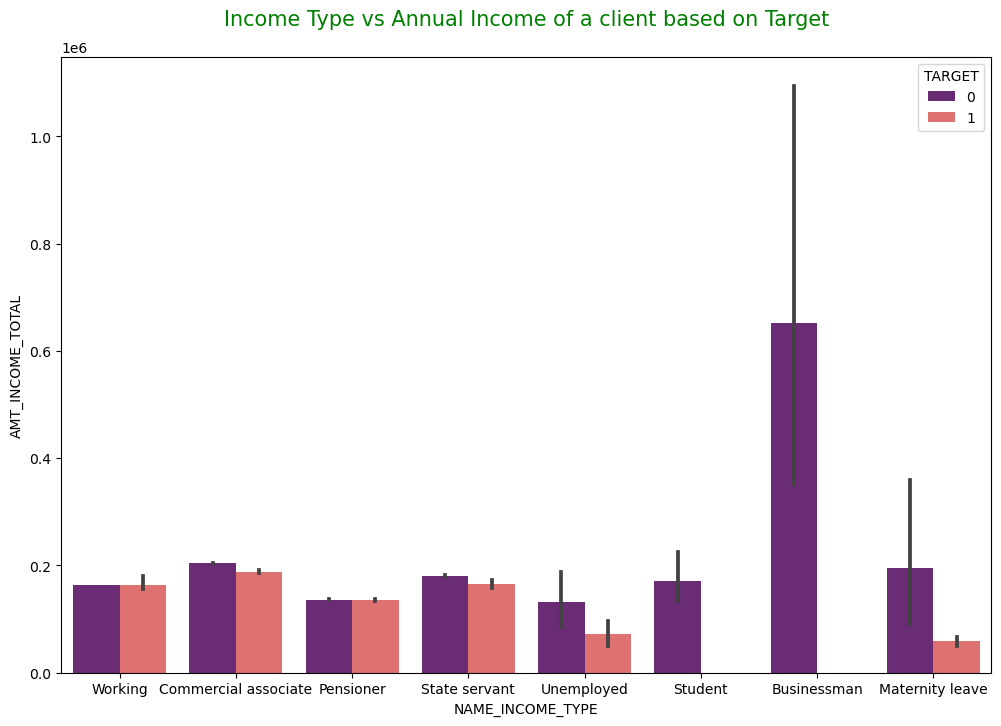

In [109]:
plt.figure(figsize = (12,8))
sns.barplot(data = df2, x= 'NAME_INCOME_TYPE',y = 'AMT_INCOME_TOTAL', order=df2['NAME_INCOME_TYPE'].value_counts().index,hue = 'TARGET',palette='magma')    
plt.title('Income Type vs Annual Income of a client based on Target\n', color = 'Green',fontsize = 15)
plt.show()

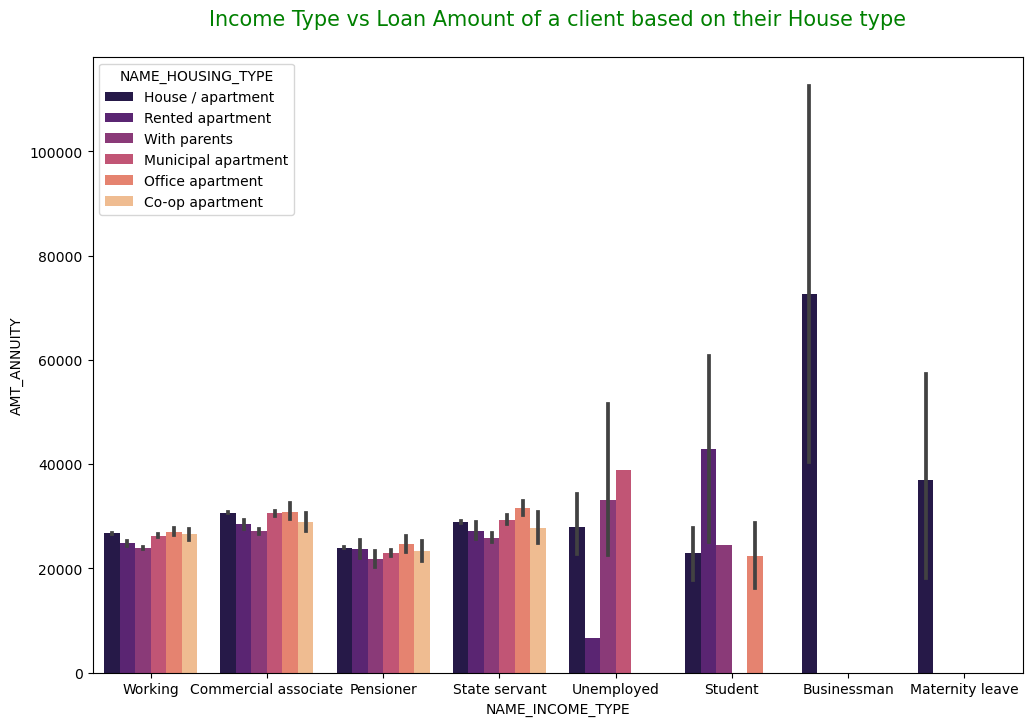

In [110]:
plt.figure(figsize = (12,8))
sns.barplot(data = df2, x= 'NAME_INCOME_TYPE',y = 'AMT_ANNUITY', order=df2['NAME_INCOME_TYPE'].value_counts().index,hue = 'NAME_HOUSING_TYPE',palette='magma')   
plt.title('Income Type vs Loan Amount of a client based on their House type\n', color = 'Green',fontsize = 15)
plt.show()

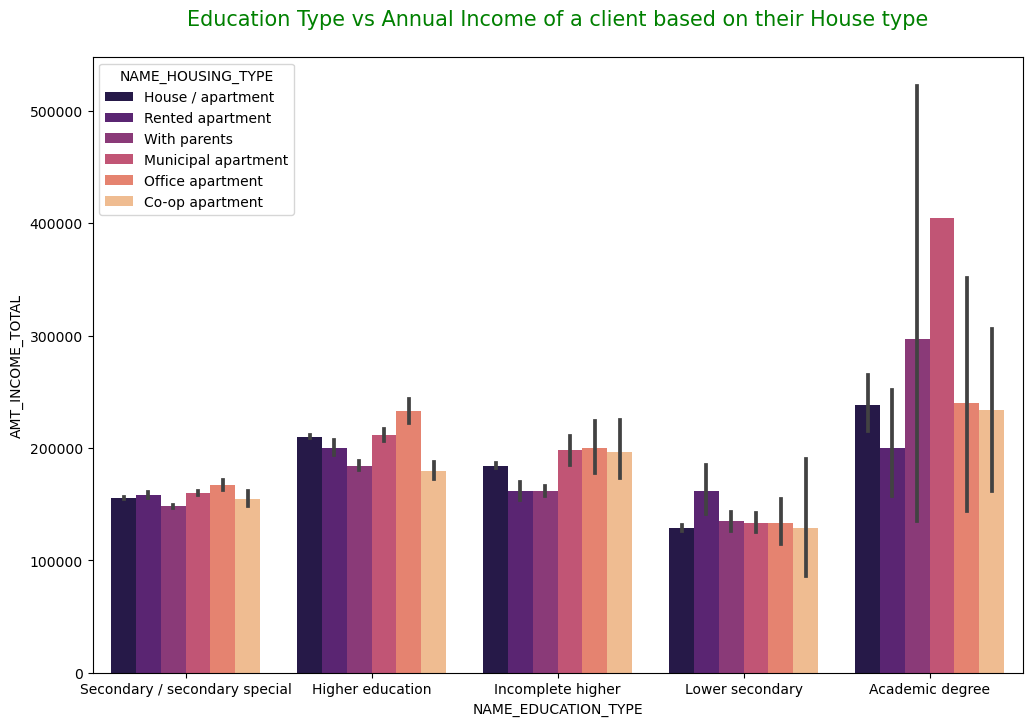

In [111]:
plt.figure(figsize = (12,8))
sns.barplot(data = df2, x= 'NAME_EDUCATION_TYPE',y = 'AMT_INCOME_TOTAL', order=df2['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'NAME_HOUSING_TYPE',palette='magma')
plt.title('Education Type vs Annual Income of a client based on their House type\n', color = 'Green',fontsize = 15)
plt.show()

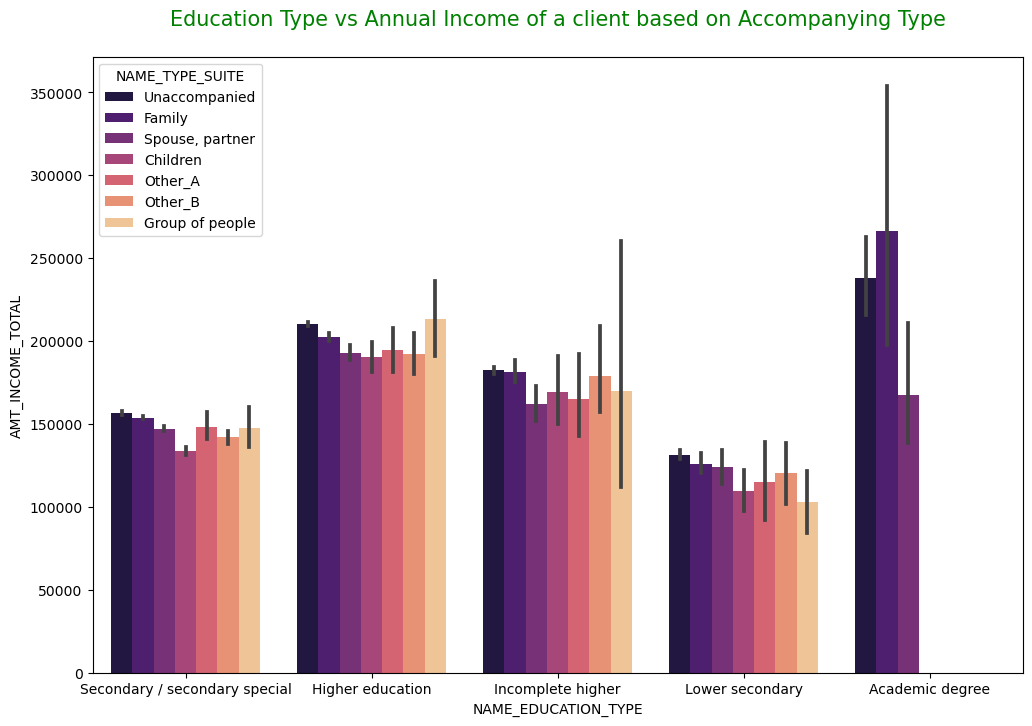

In [112]:
plt.figure(figsize = (12,8))
sns.barplot(data = df2, x= 'NAME_EDUCATION_TYPE',y = 'AMT_INCOME_TOTAL', order=df2['NAME_EDUCATION_TYPE'].value_counts().index,hue = 'NAME_TYPE_SUITE',palette='magma')
plt.title('Education Type vs Annual Income of a client based on Accompanying Type\n', color = 'Green',fontsize = 15)
plt.show()

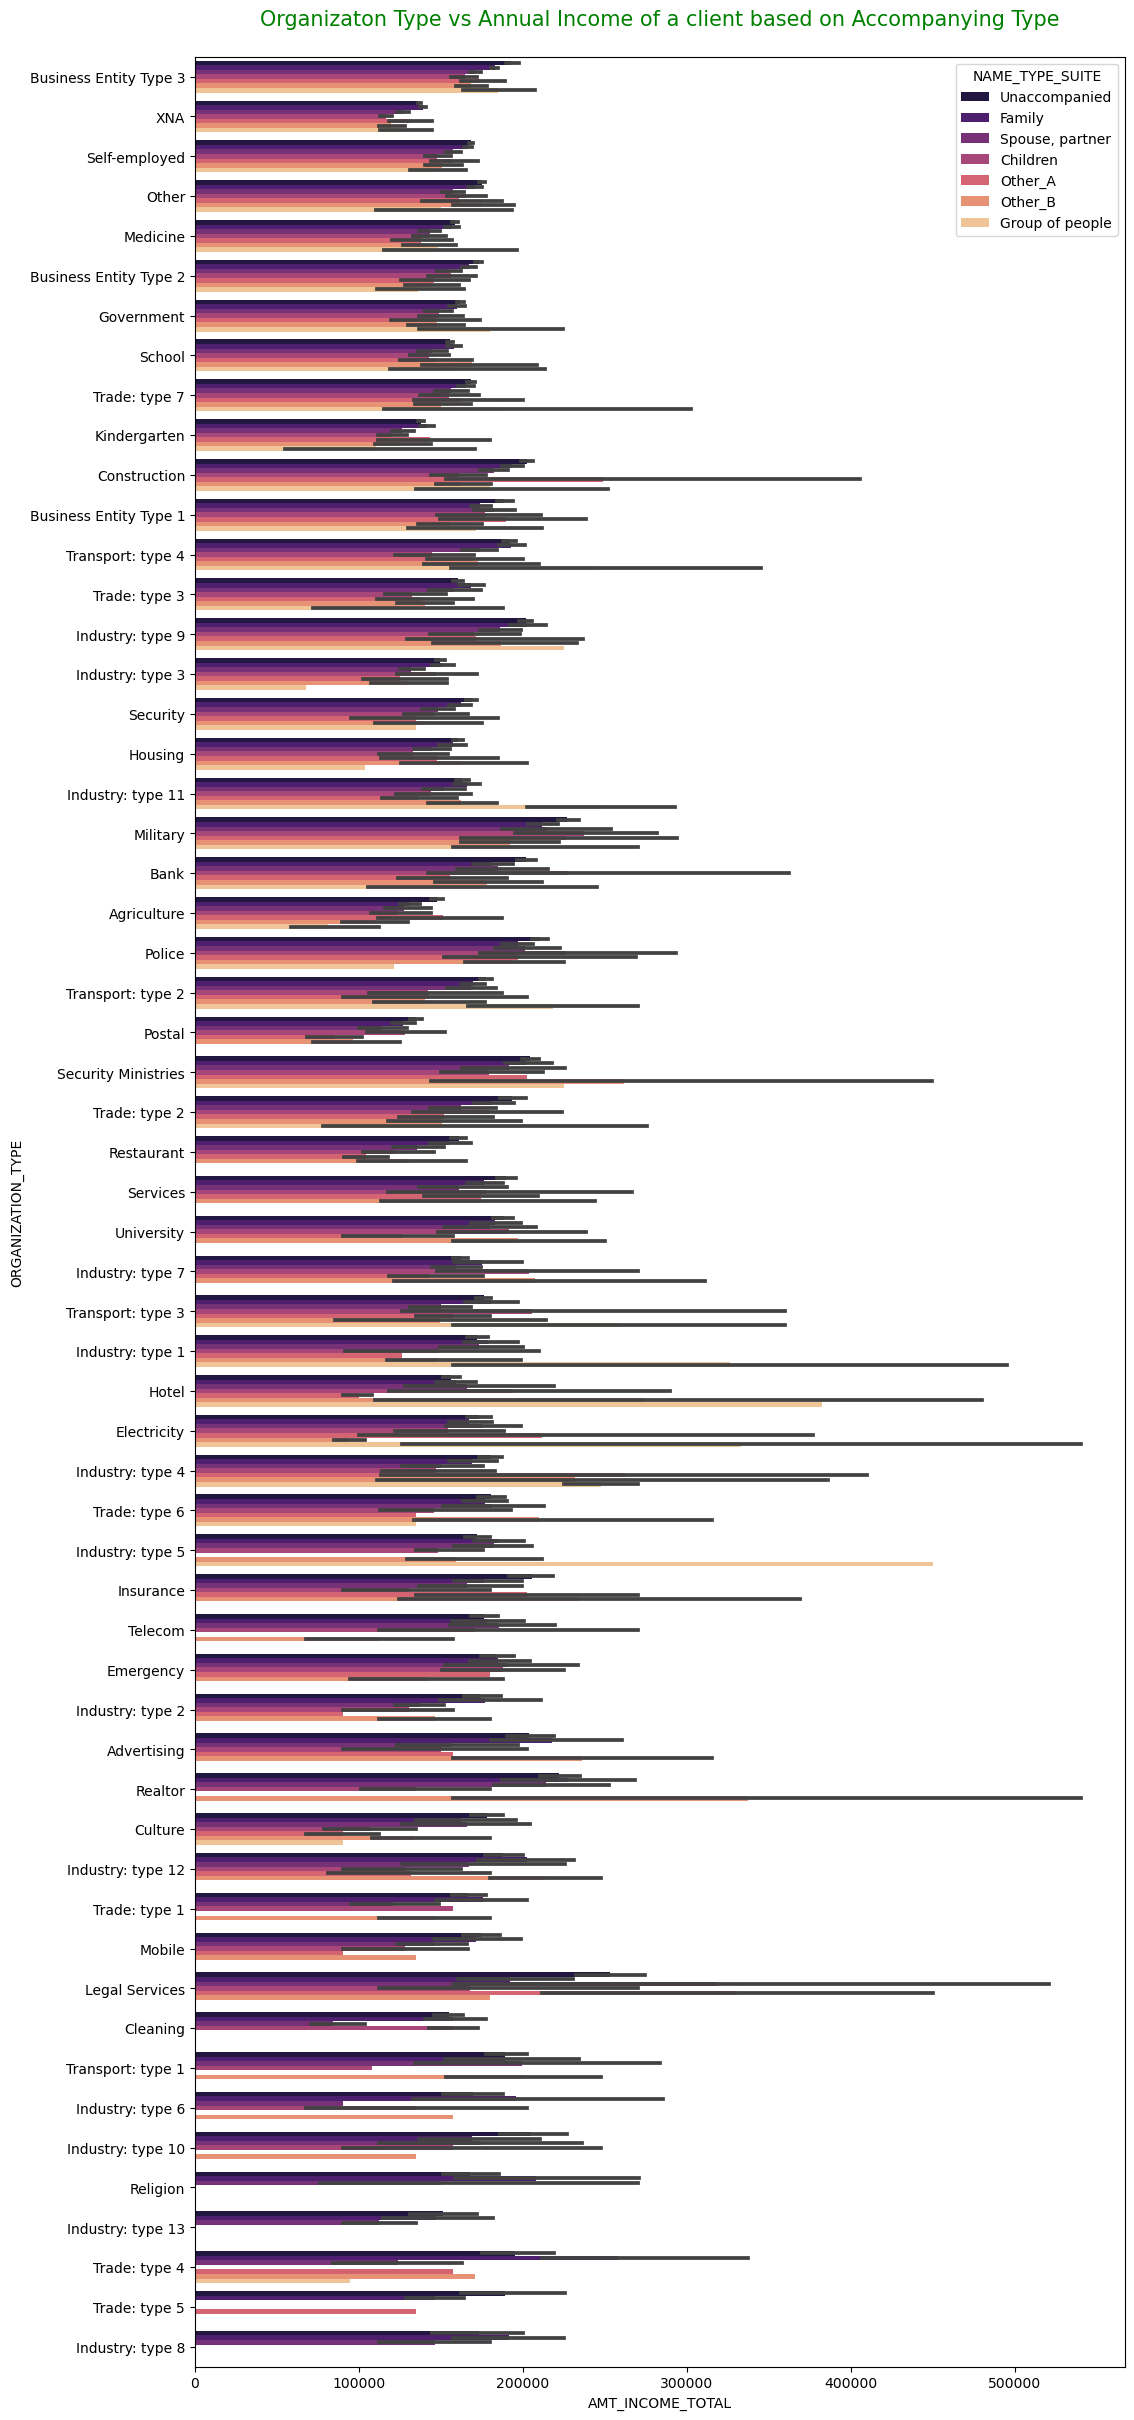

In [113]:
plt.figure(figsize = (12,30))
sns.barplot(data = df2, y= 'ORGANIZATION_TYPE',x = 'AMT_INCOME_TOTAL', order=df2['ORGANIZATION_TYPE'].value_counts().index,hue = 'NAME_TYPE_SUITE',palette='magma')
plt.title('Organizaton Type vs Annual Income of a client based on Accompanying Type\n', color = 'Green',fontsize = 15)
plt.show()

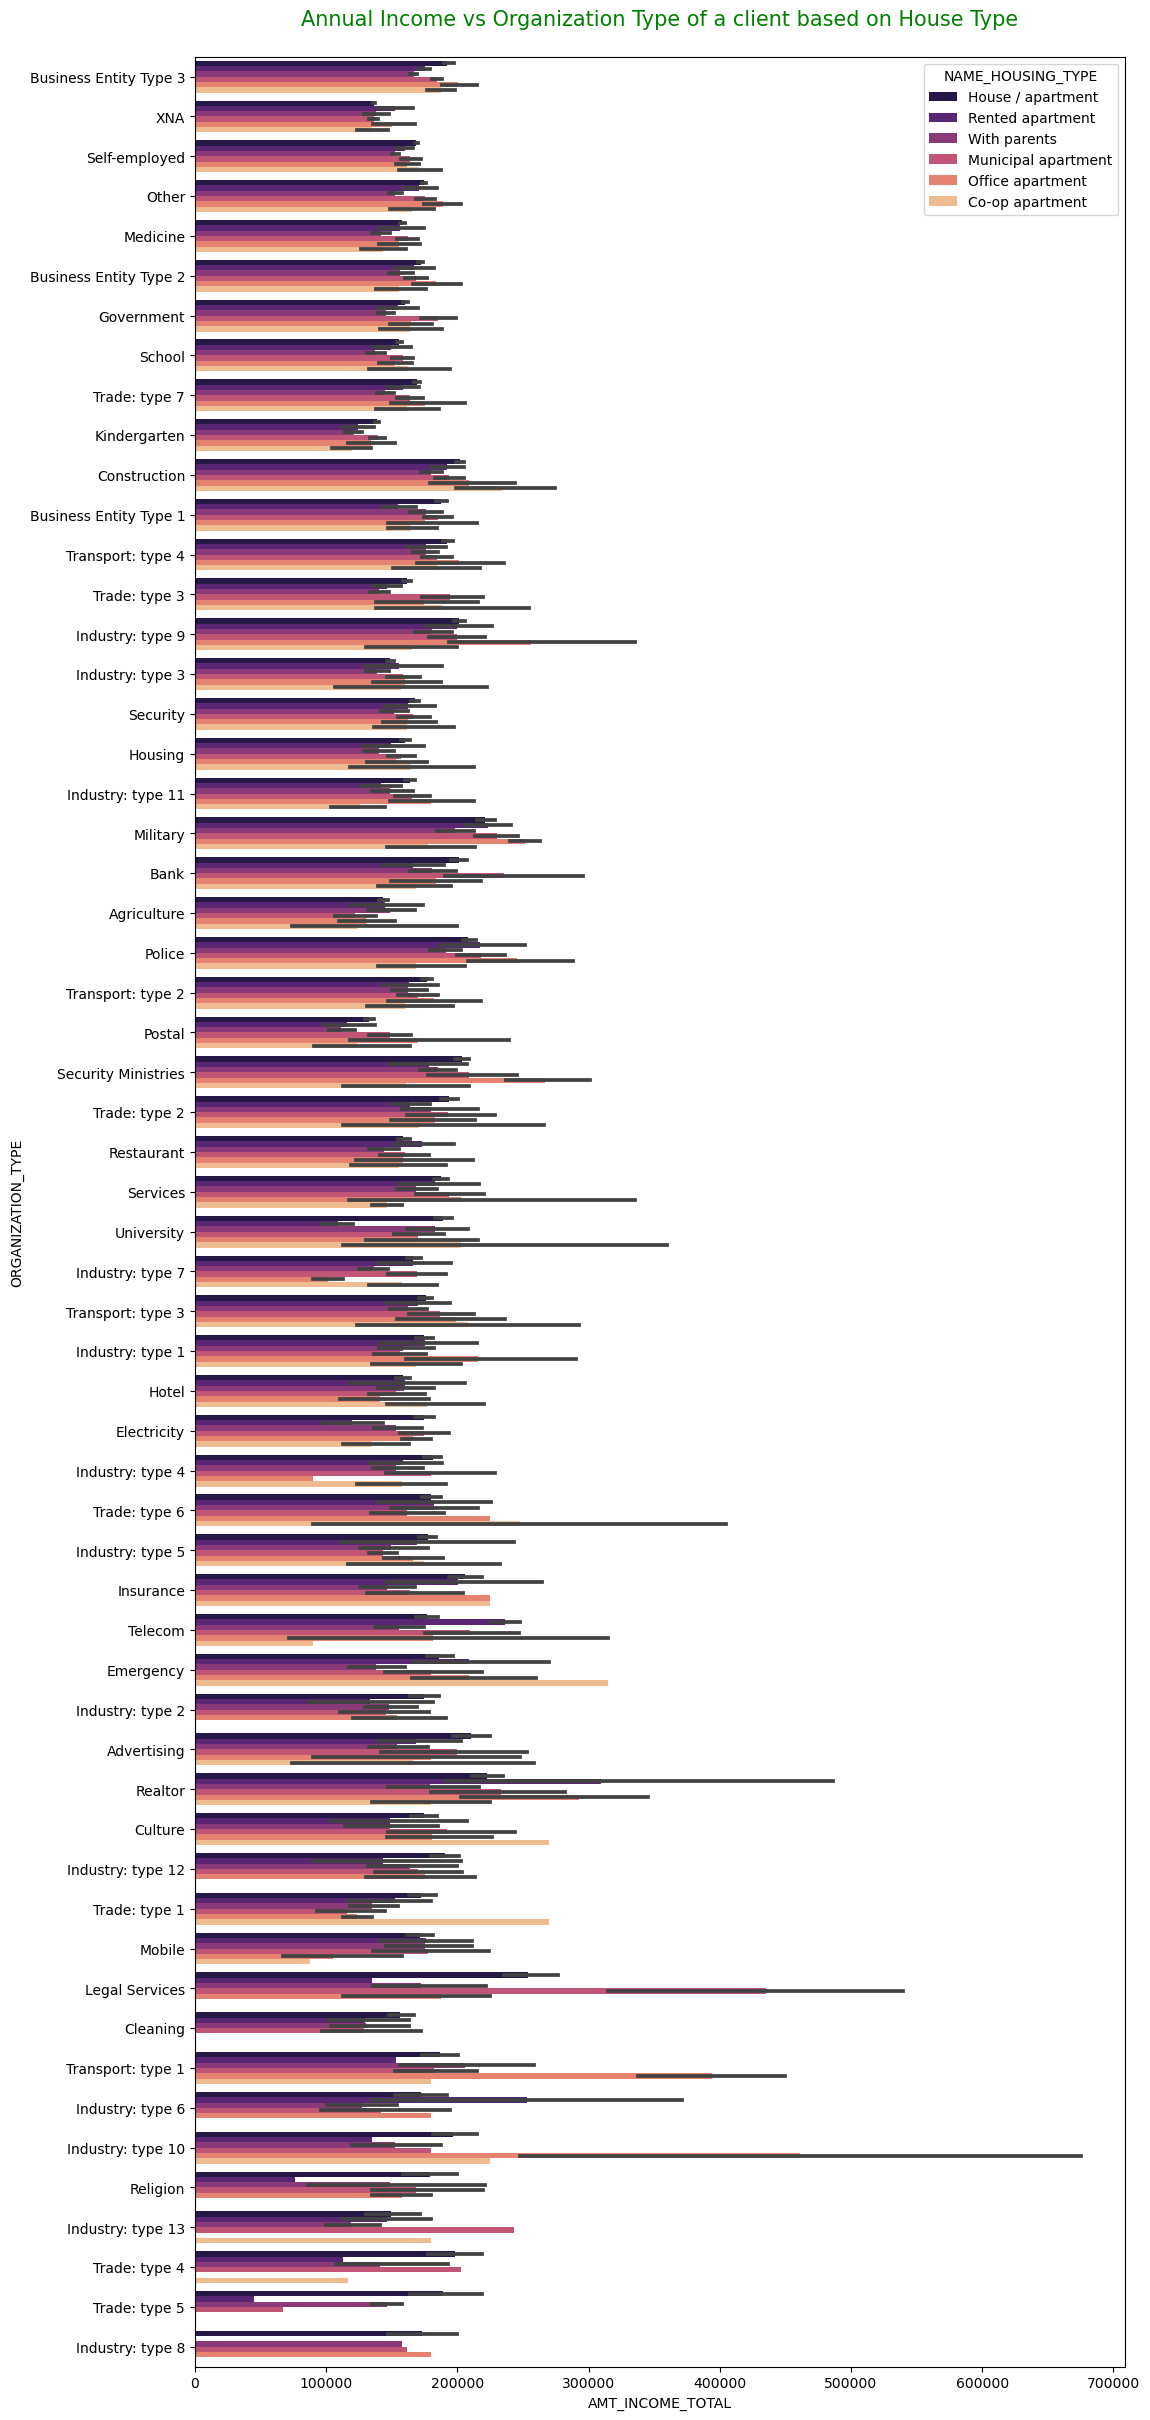

In [114]:
plt.figure(figsize = (12,30))
sns.barplot(data = df2,x = 'AMT_INCOME_TOTAL', y= 'ORGANIZATION_TYPE', order=df2['ORGANIZATION_TYPE'].value_counts().index,hue = 'NAME_HOUSING_TYPE',palette='magma')
plt.title('Annual Income vs Organization Type of a client based on House Type\n', color = 'Green',fontsize = 15)
plt.show()

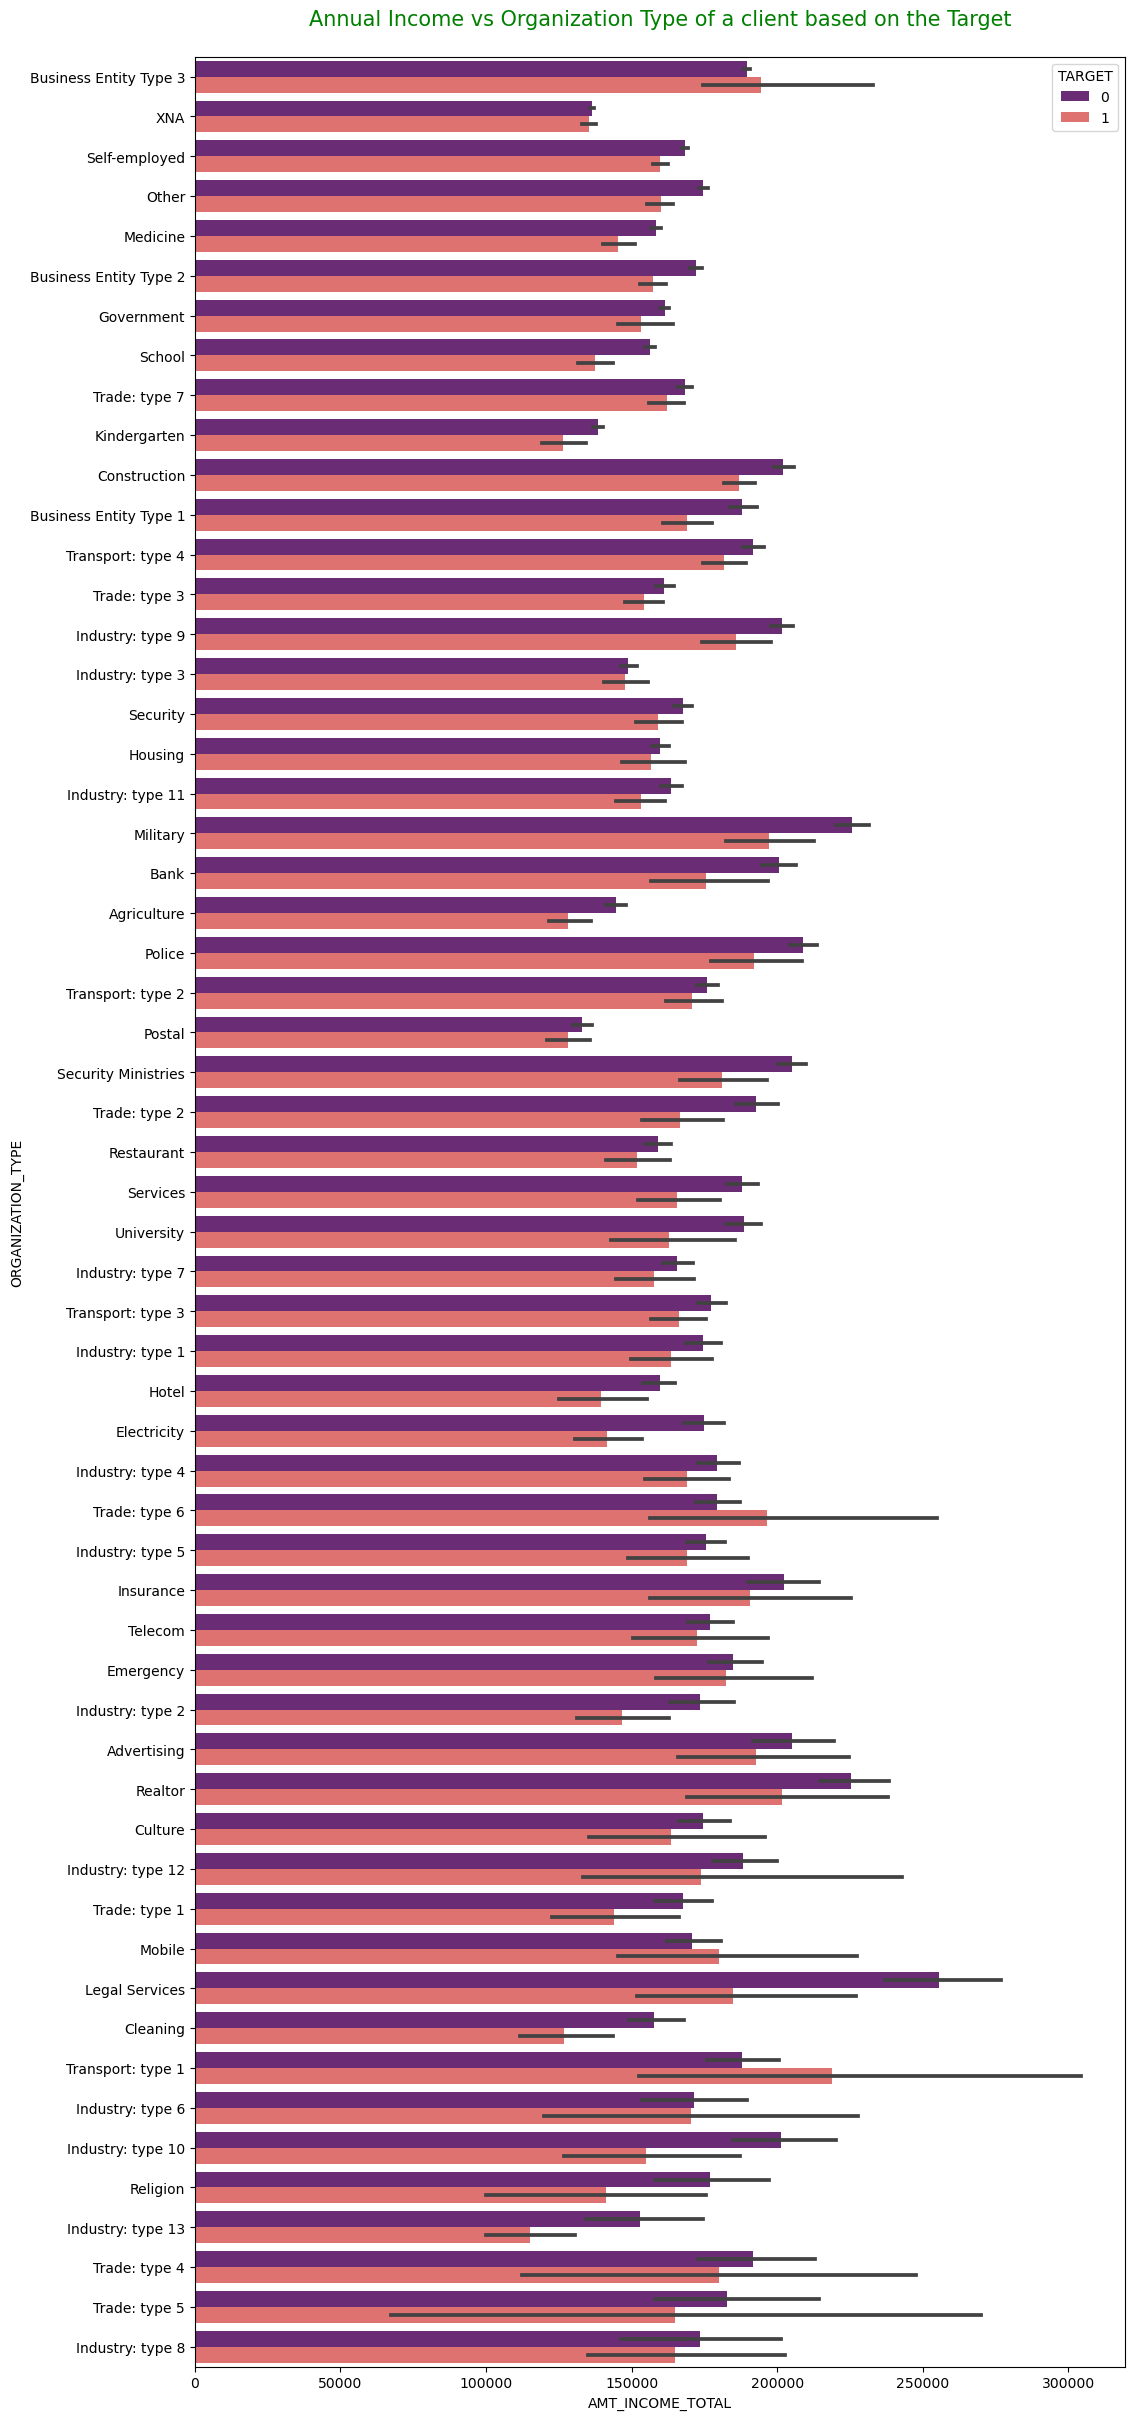

In [115]:
plt.figure(figsize = (12,30))
sns.barplot(data = df2,x = 'AMT_INCOME_TOTAL', y= 'ORGANIZATION_TYPE', order=df2['ORGANIZATION_TYPE'].value_counts().index,hue = 'TARGET',palette='magma')
plt.title('Annual Income vs Organization Type of a client based on the Target\n', color = 'Green',fontsize = 15)
plt.show()

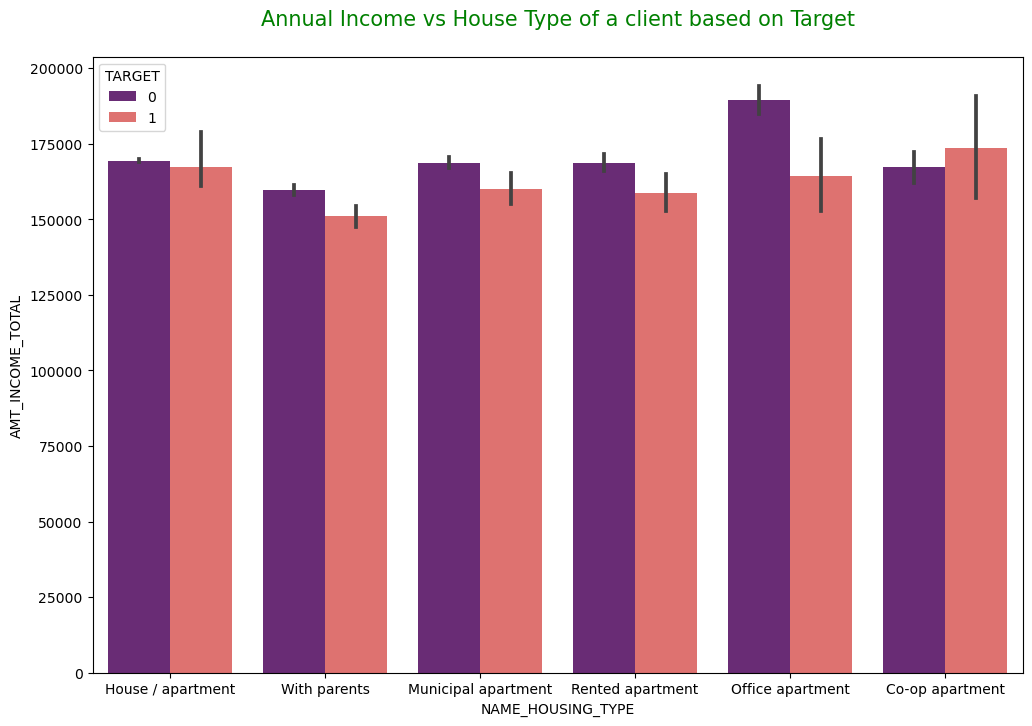

In [116]:
plt.figure(figsize = (12,8))
sns.barplot(data = df2,y = 'AMT_INCOME_TOTAL', x= 'NAME_HOUSING_TYPE', order=df2['NAME_HOUSING_TYPE'].value_counts().index,hue = 'TARGET',palette='magma')
plt.title('Annual Income vs House Type of a client based on Target\n', color = 'Green',fontsize = 15)
plt.show()

<Axes: >

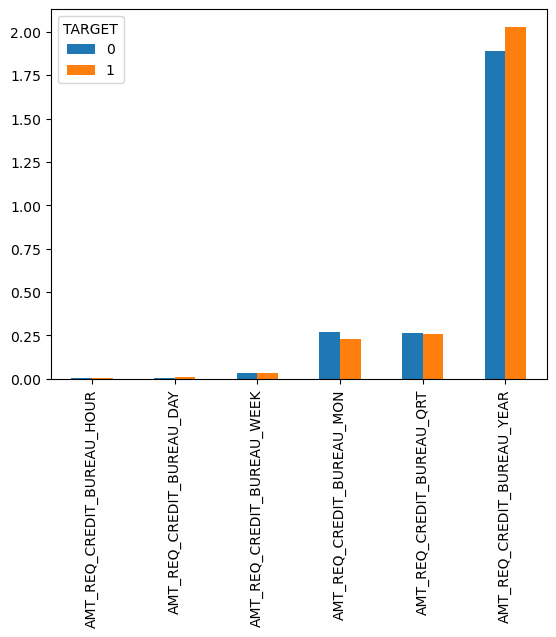

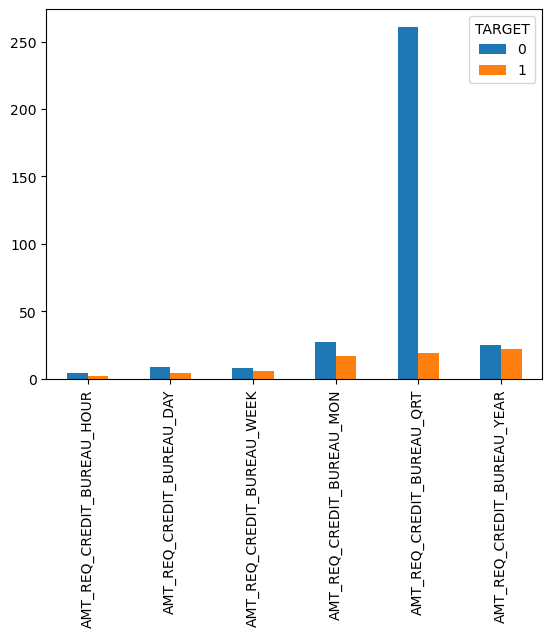

In [117]:
df2.groupby('TARGET')[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].mean().transpose().plot.bar()


df2.groupby('TARGET')[['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']].max().transpose().plot.bar()



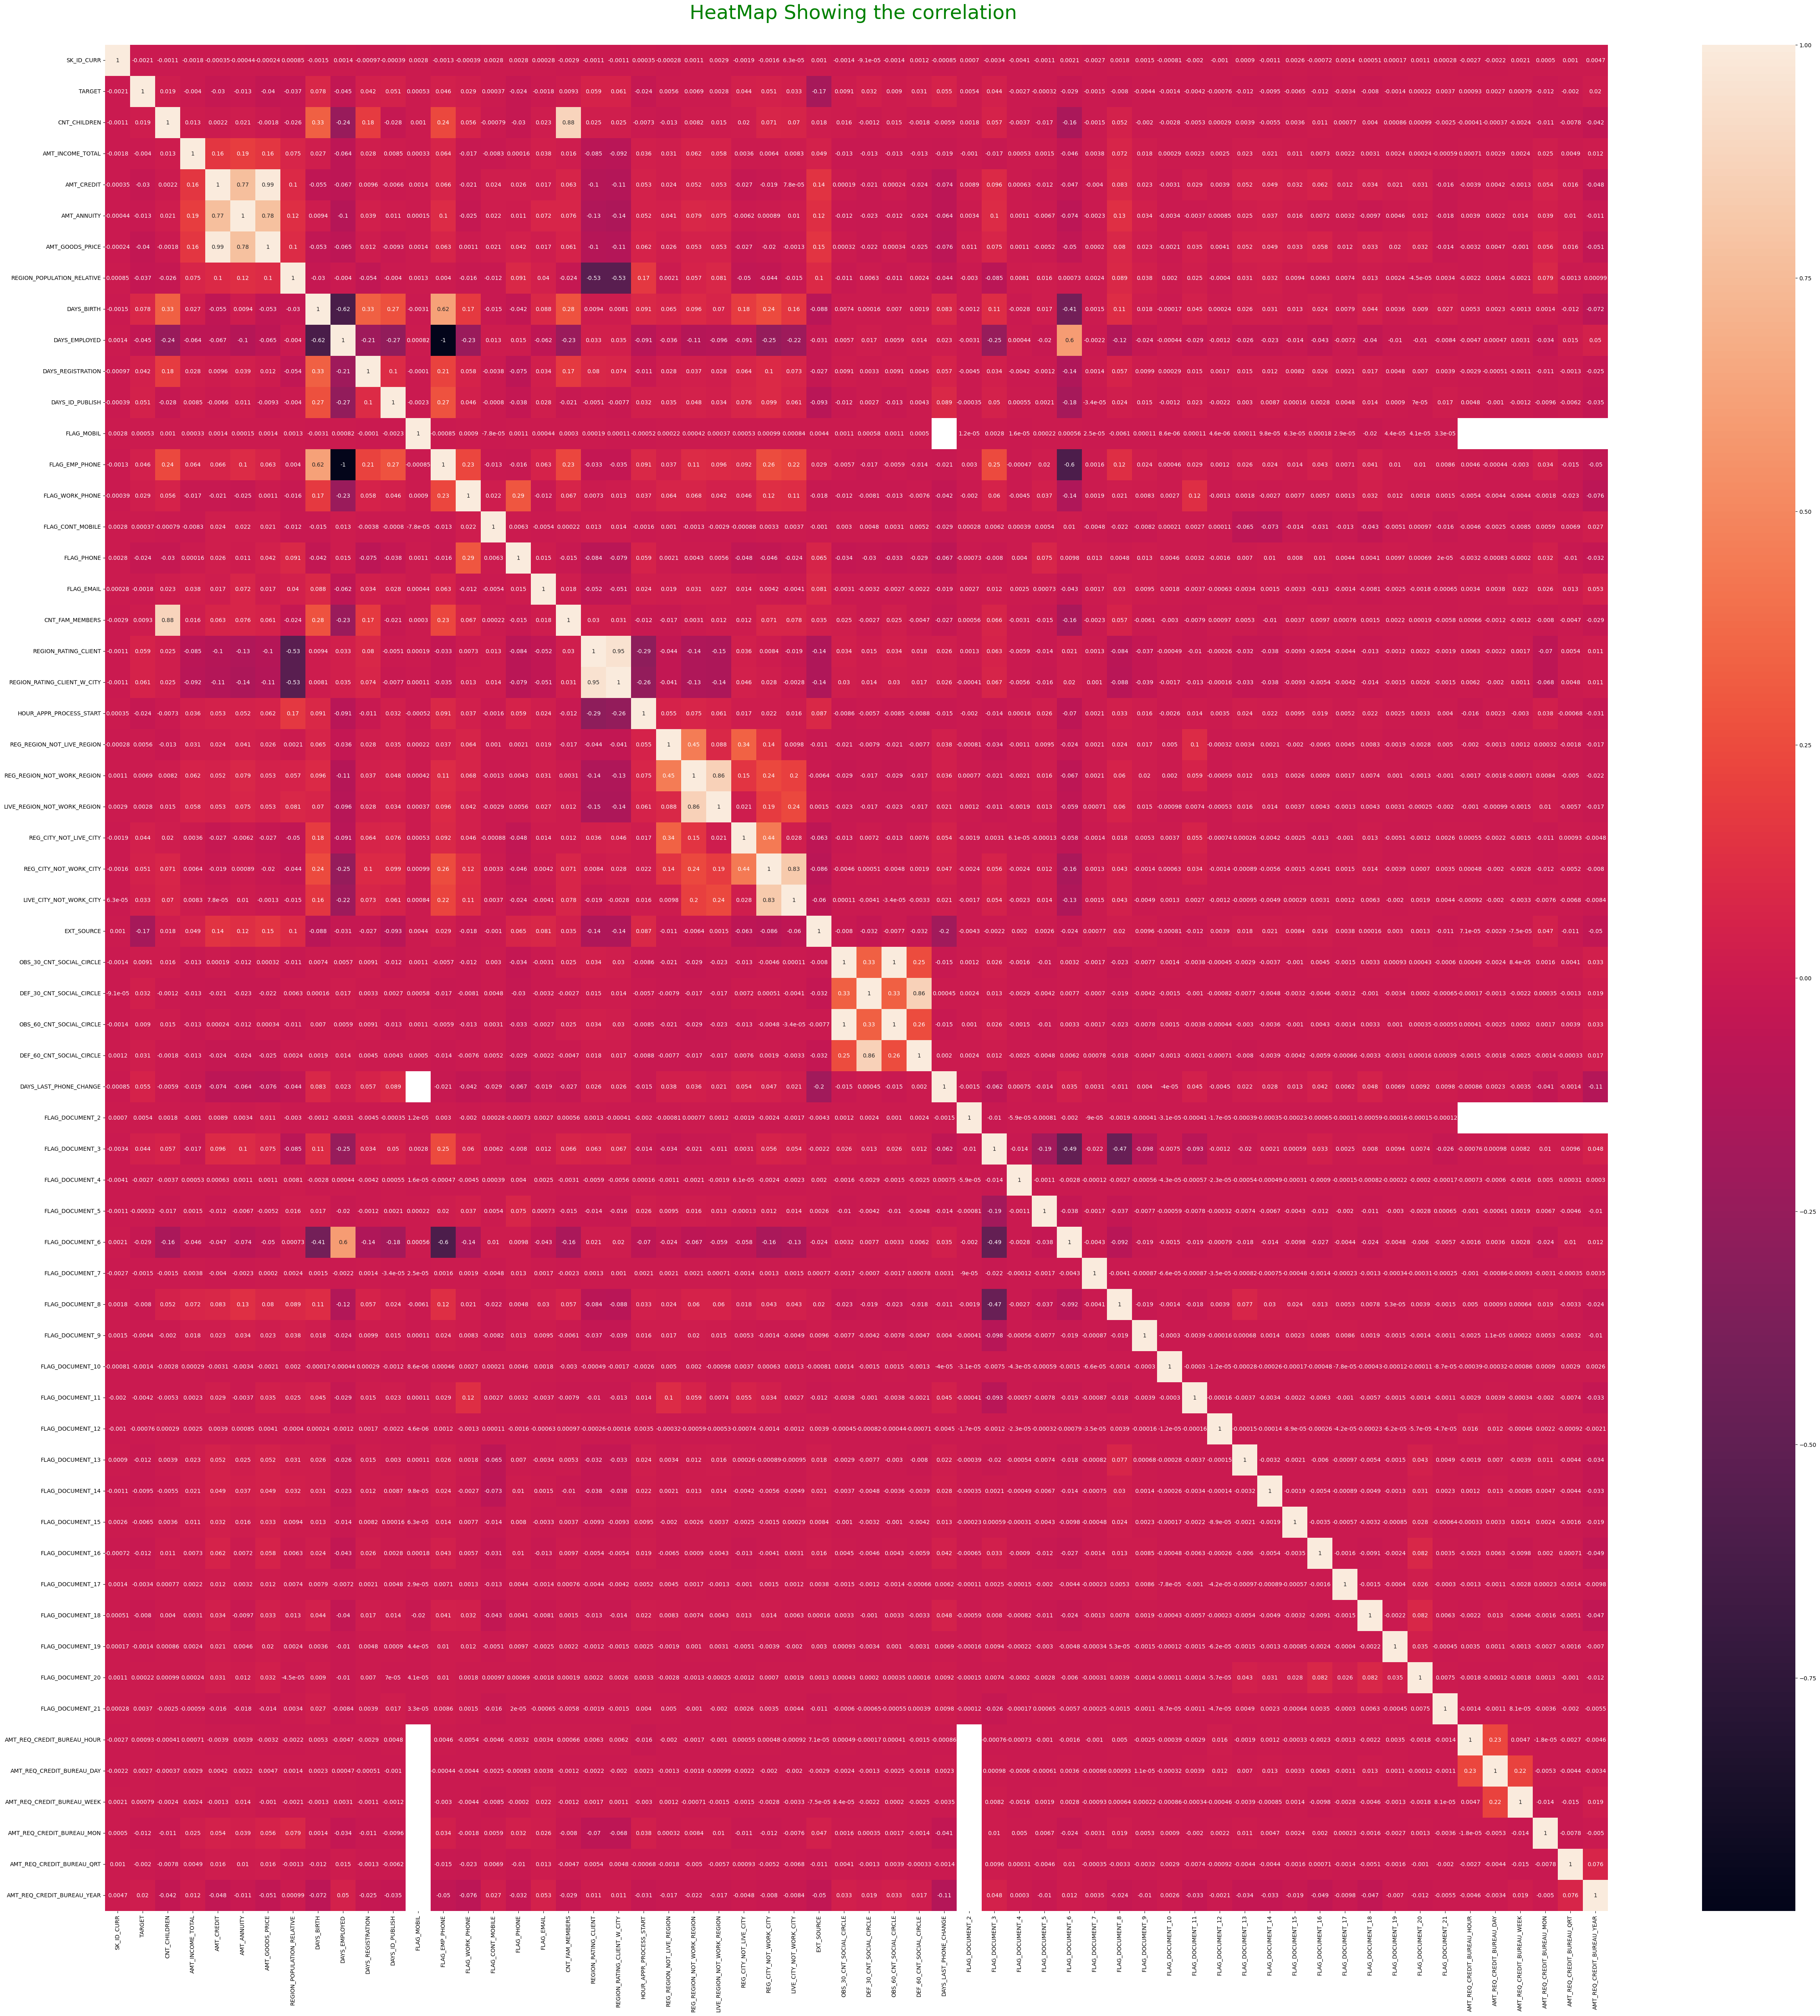

In [118]:
plt.figure(figsize = (60,60))
sns.heatmap(df2.corr(),annot = True)
plt.title('HeatMap Showing the correlation \n', color = 'Green',fontsize = 35)
plt.show()

Text(0.5, 1.0, 'Plot showing the correlation between Family Members and Children\n')

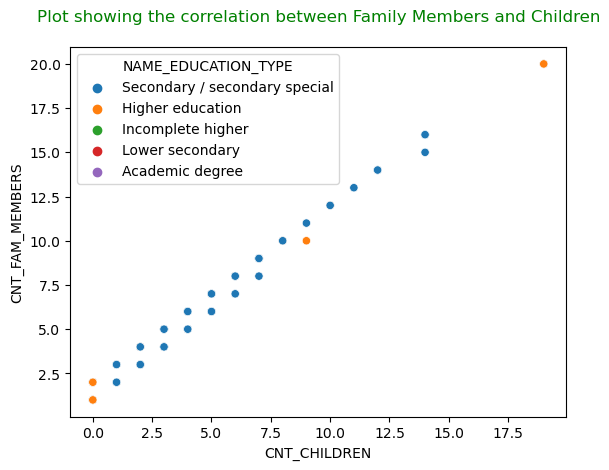

In [119]:
sns.scatterplot(x = df2.CNT_CHILDREN, y = df2.CNT_FAM_MEMBERS,hue = df2.NAME_EDUCATION_TYPE)
plt.title('Plot showing the correlation between Family Members and Children\n',color = 'green')

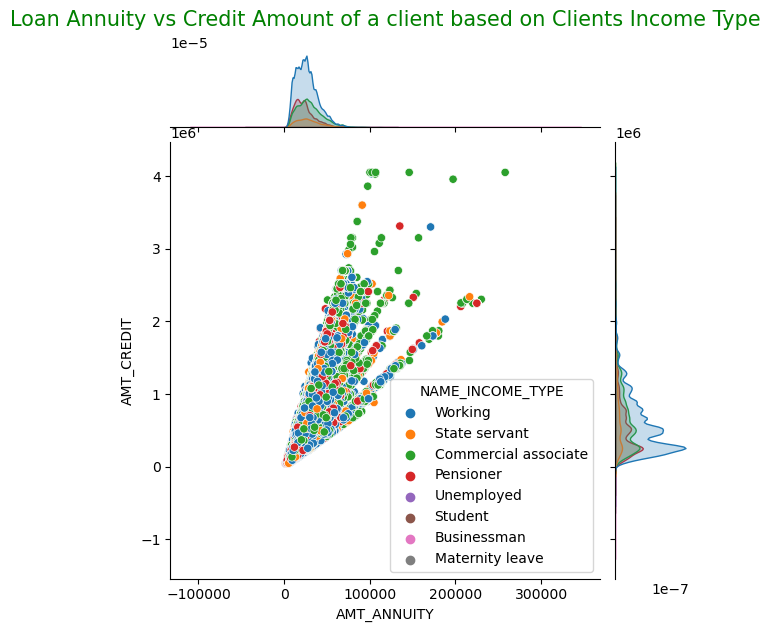

In [120]:
sns.jointplot(x = df2.AMT_ANNUITY, y = df2.AMT_CREDIT,hue = df2.NAME_INCOME_TYPE)
plt.title('Loan Annuity vs Credit Amount of a client based on Clients Income Type\n\n\n\n', color = 'Green',fontsize = 15)
plt.show()

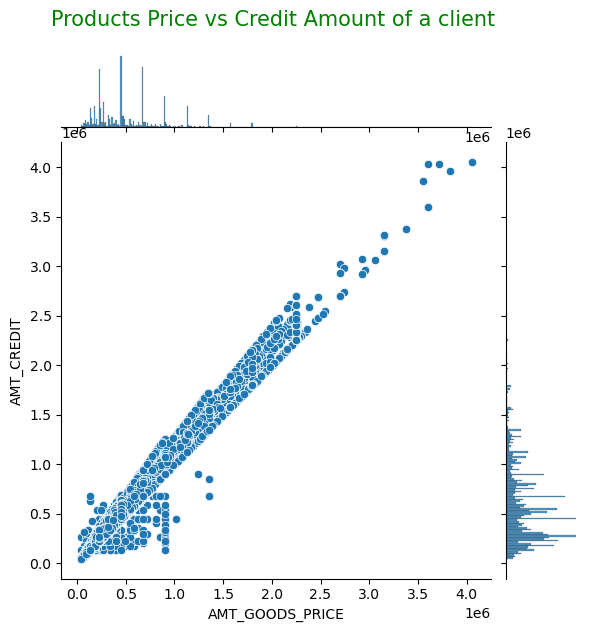

In [121]:
sns.jointplot(x = df2.AMT_GOODS_PRICE, y = df2.AMT_CREDIT)
plt.title('Products Price vs Credit Amount of a client \n\n\n\n', color = 'Green',fontsize = 15)
plt.show()

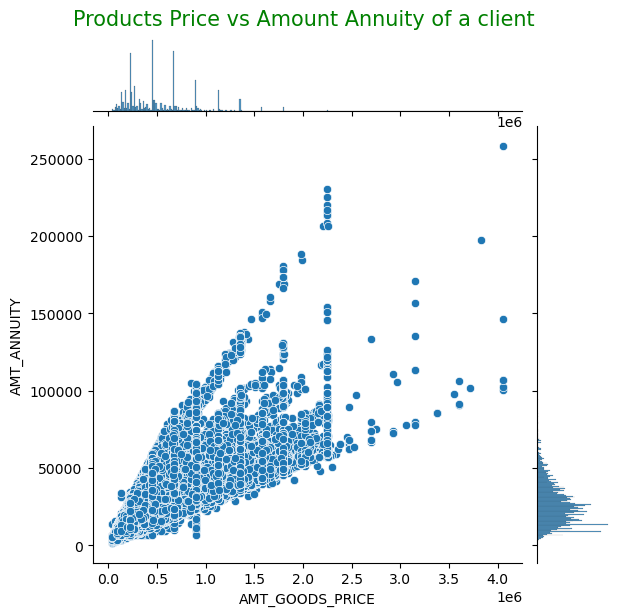

In [122]:
sns.jointplot(x = df2.AMT_GOODS_PRICE, y = df2.AMT_ANNUITY)
plt.title('Products Price vs Amount Annuity of a client \n\n\n\n', color = 'Green',fontsize = 15)
plt.show()

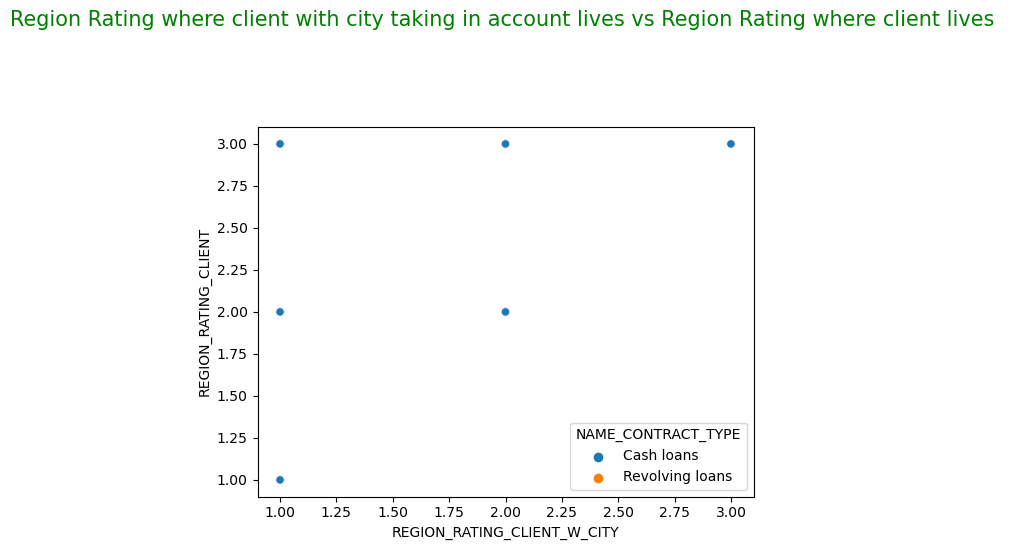

In [123]:
sns.scatterplot(x = df2.REGION_RATING_CLIENT_W_CITY, y = df2.REGION_RATING_CLIENT,hue = df2.NAME_CONTRACT_TYPE)
plt.title('Region Rating where client with city taking in account lives vs Region Rating where client lives \n\n\n\n', color = 'Green',fontsize = 15)
plt.show()

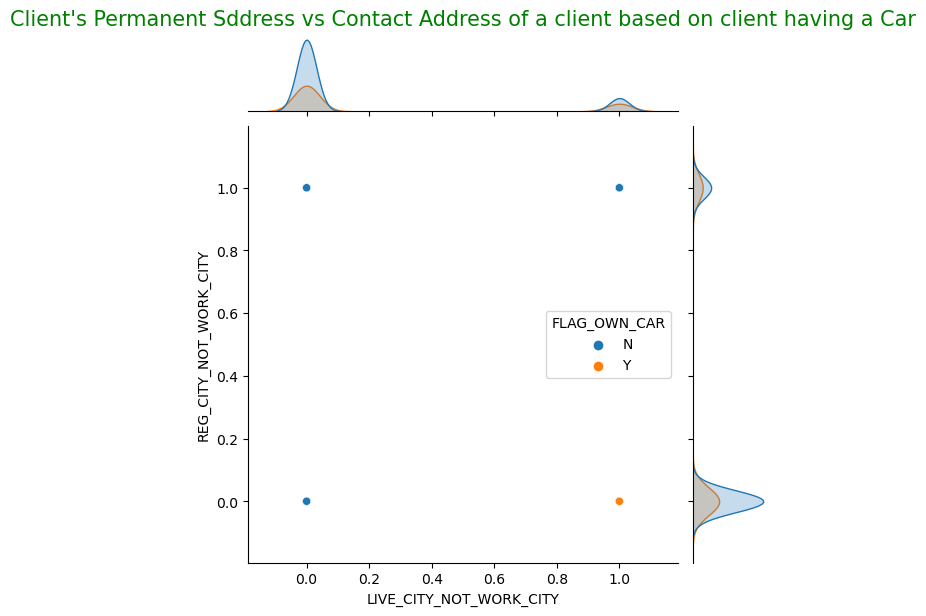

In [124]:
sns.jointplot(x = df2.LIVE_CITY_NOT_WORK_CITY, y = df2.REG_CITY_NOT_WORK_CITY,hue = df2.FLAG_OWN_CAR)
plt.title('Client\'s Permanent Sddress vs Contact Address of a client based on client having a Car\n\n\n\n', color = 'Green',fontsize = 15)
plt.show()

In [125]:
df2.REG_REGION_NOT_WORK_REGION.value_counts()

0    291895
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64

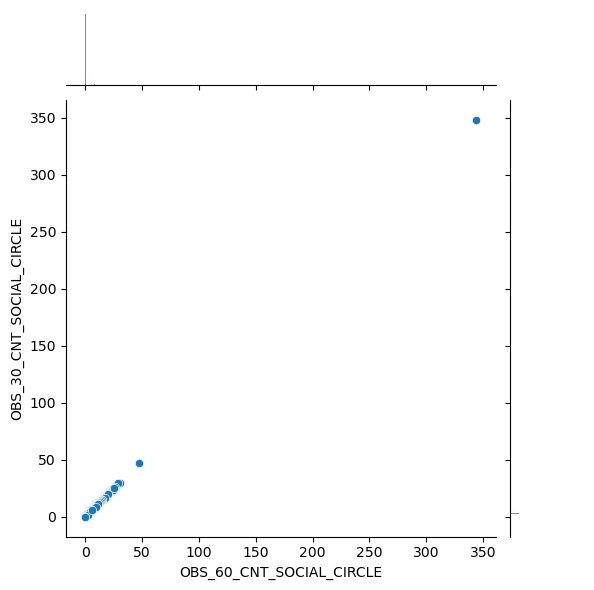

In [126]:
sns.jointplot(x = df2.OBS_60_CNT_SOCIAL_CIRCLE, y = df2.OBS_30_CNT_SOCIAL_CIRCLE)


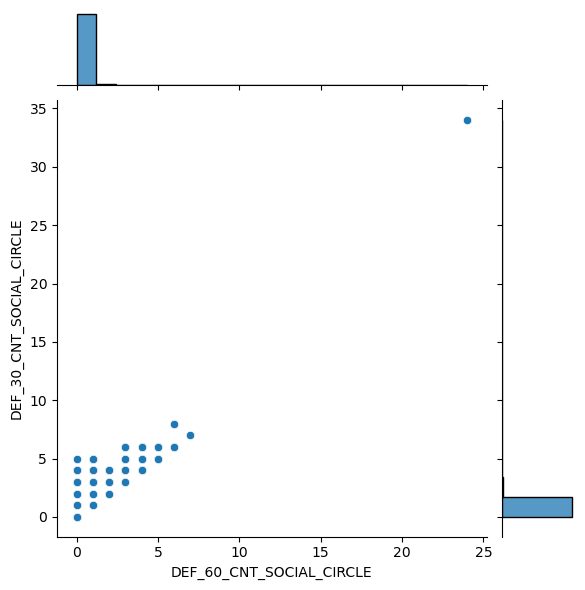

In [127]:
sns.jointplot(x = df2.DEF_60_CNT_SOCIAL_CIRCLE, y = df2.DEF_30_CNT_SOCIAL_CIRCLE)

<Axes: xlabel='FLAG_EMP_PHONE', ylabel='DAYS_EMPLOYED'>

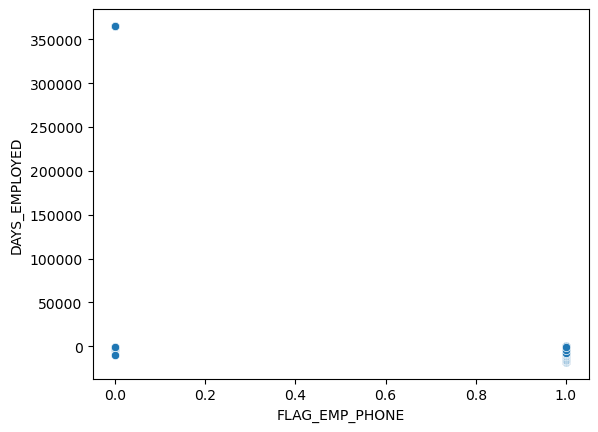

In [128]:
sns.scatterplot(x = df2.FLAG_EMP_PHONE, y = df2.DAYS_EMPLOYED)

In [129]:
df2.groupby('TARGET')['FLAG_EMP_PHONE'].value_counts()

TARGET  FLAG_EMP_PHONE
0       1                 230287
        0                  52395
1       1                  21834
        0                   2991
Name: FLAG_EMP_PHONE, dtype: int64

In [130]:
df2.FLAG_MOBIL.value_counts()

1    307506
0         1
Name: FLAG_MOBIL, dtype: int64

In [131]:
df2.groupby('TARGET')['FLAG_MOBIL'].value_counts()

TARGET  FLAG_MOBIL
0       1             282681
        0                  1
1       1              24825
Name: FLAG_MOBIL, dtype: int64

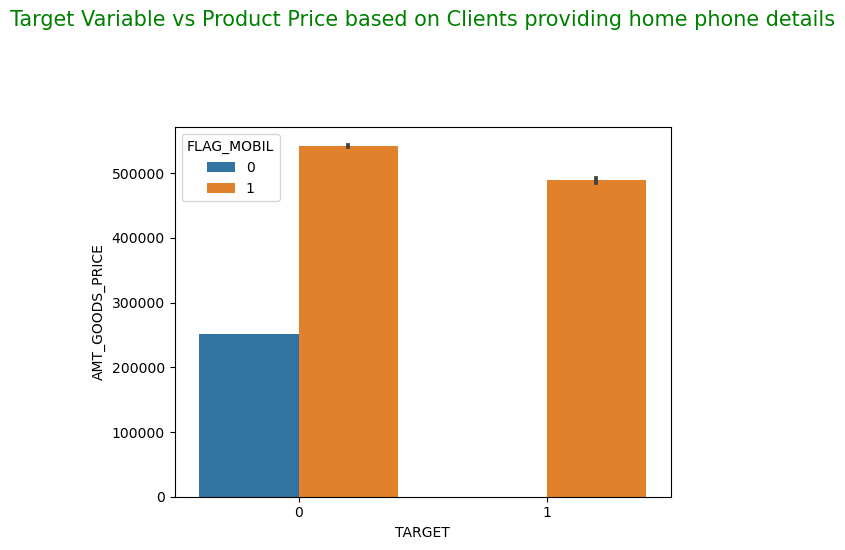

In [132]:
sns.barplot(x = df2.TARGET,y = df2.AMT_GOODS_PRICE, hue = df2.FLAG_MOBIL)
plt.title('Target Variable vs Product Price based on Clients providing home phone details\n\n\n\n', color = 'Green',fontsize = 15)
plt.show()

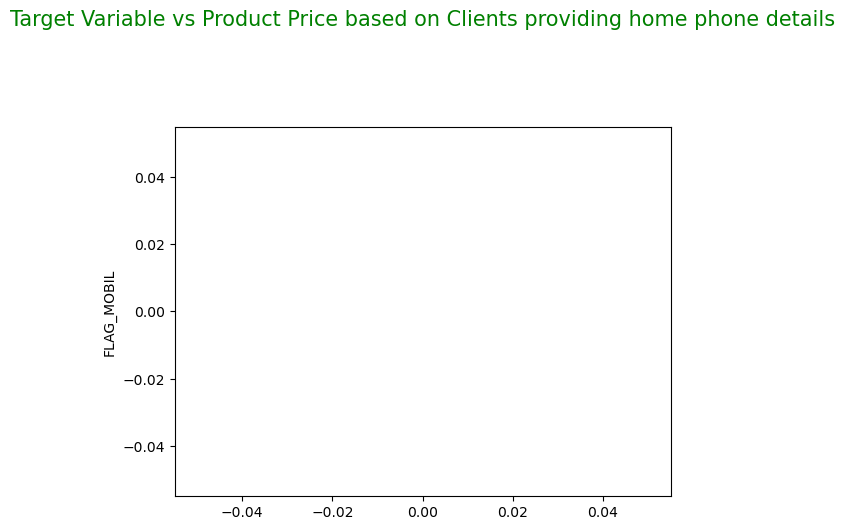

In [133]:
sns.scatterplot(y =  df2.FLAG_MOBIL)
plt.title('Target Variable vs Product Price based on Clients providing home phone details\n\n\n\n', color = 'Green',fontsize = 15)
plt.show()

# Outcomes 

1. Client providing their phone details have more chances of approving the loan increases
2. Goods Price and amount Credit has the highest correlation.
3. Company should focus more on State Servants and Working.
4. Company should be careful while giving loans to the Businessman, Students and Marital Level as they are ore likely towards not paying the installments on time.
5. Also with loan purpose ‘Repair’ is having higher number of unsuccessful payments on time.
6. Company is more likely to give payment to people who gives their full details and has a phone.
7. Get as much as clients from housing type ‘With parents’ as they are having least number of unsuccessful payments.